In [1]:
import pandas as pd
from bs4 import BeautifulSoup as bs
import re
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import collections
from collections import Counter

In [2]:
tags_list = []

with open('tin_slovar.html', 'r', encoding='Windows-1251') as f: 
    text = f.read() 
    soup0 = bs(text,'html.parser')
    tags = soup0.find_all('p', {'style': 'text-align:justify;text-indent:14.2pt'})
    for tag in tags:
        tags_list.append(tag)
        
    text = text.replace('µ','У́')
    pattern1 = '<sup>1</sup>'
    text = re.sub(pattern1, '¹', text)
    pattern2 = '<sup>2</sup>'
    text = re.sub(pattern2, '²', text)
    pattern3 = '>н</span></sup>' 
    text = re.sub(pattern3, '>ᴴ</span></sup>', text)
    pattern4 = '>Н</span></sup>' 
    text = re.sub(pattern4, '>ᴴ</span></sup>', text)
    pattern5 = '<sup>Н</sup>'
    text = re.sub(pattern5, '<sup>ᴴ</sup>', text)
    pattern6 = '<sup>1 </sup>'
    text = re.sub(pattern6, '¹', text)
    pattern7 = '<sup>2 </sup>'
    text = re.sub(pattern7, '²', text)
    pattern8 = '>1</span></sup>'
    text = re.sub(pattern8, '>¹</span></sup>', text)
    pattern9 = '>2</span></sup>'
    text = re.sub(pattern9, '>²</span></sup>', text)
    text = text.replace('&iacute;', 'В̅')
    text = text.replace('&five;', 'Ⅴ') 
    text = text.replace('&Eds;', 'Ḕ')
    text = text.replace('&eds;', 'ḕ')
    text = text.replace('&Yds;', 'Ӯ́')
    text = text.replace('&Ads;', 'Ā̀')
    text = text.replace('&Ids;', 'Ӣ́')
    text = text.replace('&aelig;', 'З̅')
    text = text.replace('&Chi;', 'ЧI̅')
    text = text.replace('&L;', 'ЛЪ̅')
    text = text.replace('&Icirc;', 'Ӯ')
    text = text.replace('&#352;', 'ӯ')
    text = text.replace('>[<', '>ӯ<')
    text = text.replace('&sup3;', 'Э̀')
    text = text.replace('&ordf;', 'э̀') 
    text = text.replace('&Ecirc;', 'Ā́')
    text = text.replace('&Ecircc;', 'Ā́') #Ê если вдруг не опечатка
    text = text.replace('&sup2;', 'Э́')
    text = text.replace('&Euml;', 'Ḗ')
    text = text.replace('&aring;', 'Н̅') 
    text = text.replace('&ccedil;', 'Д̅') 
    text = text.replace('&euml;', 'э̄')
    text = text.replace('&Ucirc;', 'д̅')
    text = text.replace('&Auml;', 'Ӯ̀')
    text = text.replace('&auml;', 'Б̅')
    text = text.replace('&Atilde;', 'Ӣ̀')
    text = text.replace('&Igrave;', 'Ṓ')
    text = text.replace('&szlig;', 'й̅') 
    text = text.replace('>h<', '>ЦI<')
    text = text.replace('>Q<', '>ѝ<')
    text = text.replace('>ER<', '>Л̅И́<')
    text = text.replace('>RE<', '>И́Л̅<')
    text = text.replace('>Eµ<', '>Л̅У́<')
    text = text.replace('>AR<', '>С̅И́<')
    text = text.replace('>«<', '>э́<')
    text = text.replace('T', 'Ц̄')  
    text = text.replace('B', 'с̅')
    text = text.replace('Y', 'ӣ')
    text = text.replace('‰', 'ṓ') 
    text = text.replace('†', 'ā́')
    text = text.replace('&pound;', 'ā̀') 
    text = text.replace('\xa0', ' ') 
    text = text.replace('F', 'л̅')
    text = text.replace('S', 'и́')
    text = text.replace('N', 'X̅') 
    text = text.replace('H', 'лъ̅') 
    text = text.replace('±', 'Э̄̀') 
    text = text.replace('°', 'Э̄́') 
    text = text.replace('>Y<', '>ӣ<')
    text = text.replace('¬', 'Э̄')
    text = text.replace('Z', 'Ӯ')
    text = text.replace('V', 'Ч̅') 
    text = text.replace('&acute;', 'У̀')
    text = text.replace('C', 'К̅') 
    text = text.replace('>RA<', '>И́С̅<')
    text = text.replace('©', 'э̄́')
    text = text.replace('D', 'к̅')
    text = text.replace('&#402;', 'ӣ̀')
    text = text.replace('P', 'Ѝ')
    text = text.replace('>U<', '>ц̄<') 
    text = text.replace('>U‚<', '>ц̄ḕ<')
    text = text.replace('W', 'ч̅') 
    text = text.replace('‡', 'ḗ')
    text = text.replace('&acirc;', 'з̅') 
    text = text.replace('&#710;', 'ӣ́')
    text = text.replace('>O<', 'x̅') #??
    text = text.replace('>A<', '>С̅<')
    text = text.replace('>m<', '>И́<')
    text = text.replace('>P<', '>Л<') #836 Р надо хз работает ли
    text = text.replace('>X<', '>Ӣ<')
    text = text.replace('&atilde;', 'М̅')
    text = text.replace('>E<', '>Л̅<')
    text = text.replace('R', 'И́')
    text = text.replace('&Iacute;', 'Ӣ')
    text = text.replace('>J<', '>ЧI̅<')

In [3]:
tin_dict = {}
lemm_list = []
trans_list_old = []
morph_list = []

soup = bs(text,'html.parser')
wordstrings = soup.find_all('p', {'style': 'text-align:justify;text-indent:14.2pt'})
for ws in tqdm(wordstrings):
    strline = ''
    line = ws.get_text()
    wstr = line.split('\n')
    for i in wstr:
        strline += ' '
        strline += i
    lemm = strline.split()[0]
    lemm_list.append(lemm)

    w = str(ws)
    morph = re.findall(r'\(<b>.*?\)', w, flags=re.DOTALL)
    if morph:
        to_morph = []
        for m in morph:
            soup2 = bs(m, 'html.parser')
            m_text = soup2.get_text()
            m_text = m_text.replace('\n', ' ')
            m_text = m_text.replace('\xa0', ' ')
            to_morph.append(m_text)
            to_morph[0] = to_morph[0].replace('O', 'x̅') 
            to_morph[0] = to_morph[0].replace('U', 'ц̄') 
        morph_list.append(to_morph[0])
        
    elif re.findall(r'\(.*?\W-.*?\)', w, flags=re.DOTALL):
        to_morph2 = []
        for m in re.findall(r'\(.*?\W-.*?\)', w, flags=re.DOTALL):
            soup2 = bs(m, 'html.parser')
            m_text = soup2.get_text()
            m_text = m_text.replace('\n', ' ')
            m_text = m_text.replace('\xa0', ' ')
            morph2 = re.findall(r'\(.*?\W-.*?\)', m_text, flags=re.DOTALL)
        if morph2:
            morph2[0] = morph2[0].replace('O', 'x̅')
            morph2[0] = morph2[0].replace('U', 'ц̄')
            morph_list.append(morph2[0])
        else:
            morph_list.append('no info')
                    
    else:
        morph_list.append('no info')
    
    strline = re.sub(lemm, '', strline)
    strline = strline.replace('O', 'x̅') 
    strline = re.sub(to_morph[0], '', strline)
    
    strline = strline.replace('()', '')
    strline = strline.replace('Q', 'ѝ') 
    strline = strline.replace('U', 'ц̄') 
    strline = strline.replace('[', 'ӯ') 

    trans_list_old.append(strline)

In [4]:
trans_list = []
for i in tqdm(range(len(trans_list_old))):
    trans_list.append(trans_list_old[i].replace(morph_list[i],''))

In [5]:
len(trans_list)

7799

In [6]:
marg = []

for t in trans_list:
    if 'нац.' in t or 'рус.' in t or 'рел.' in t or 'араб.' in t or 'перс.' in t:
        marg.append(1)
    else:
        marg.append(0)

In [7]:
new_lemm_list = []

for lemm in lemm_list:
    lemm = lemm.replace('1', '¹')
    lemm = lemm.replace('2', '²')
    lemm = lemm.replace('3', '³')
    lemm = lemm.replace('4', '⁴')
    lemm = lemm.replace(':', '//')
    lemm = lemm.replace(';', '//')
    lemm = lemm.replace('.', '')
    new_lemm_list.append(lemm)

In [8]:
tin_dict['lemm'] = new_lemm_list
tin_dict['morph'] = morph_list
tin_dict['trans'] = trans_list
tin_dict['tag'] = tags_list
tin_dict['loanwords'] = marg

In [9]:
df_divided = pd.DataFrame(data=tin_dict)
df_divided

,lemm,morph,trans,tag,loanwords
0,АБ,"(ав I, ай II, áби мн. I, ар мн. II; ащýб I,...","мест. указ. этот, эта, это (указывает на о...","[[[АБ ]], [(, [ав ]], [I], [, , [ай], \n], [...",0
1,ÁБА,"(-лIа, -иби)",III плита (каменная); аби́балIа щи́би ст...,"[[[ÁБА]], [ ], [III], [ (, [-л]], [[I]], [[а,\...",0
2,АБÁ,"(авá I, айá II, аби́ мн. I, арá мн. II)","частица указ. вот (указывает на объект, на...","[[[АБÁ]], [ (, [авá], \n], [I], [, , [айá], ...",0
3,АБÁВ,no info,частица указ. вот (обращает внимание мужчи...,"[[[АБÁВ ]], [[частица\nуказ. ]], [вот (, [об...",0
4,АБАДḖЛIА,no info,"1) старый, давно известный; абадḗлIа хабá...","[[[АБАД]], [Ë], [[Л]], [[I]], [[А]], [ 1) ста...",0
...,...,...,...,...,...
7794,Э̄́ЙЛЪ’А,"(элáло, элáлā, элалá, элáло / элáлō­та, элáлā)","понуд. 1) заквашивать, доводить до сверты...","[[°], [[ЙЛЪ’А ]], \n, [ (, []], [[элáло, элáлā...",0
7795,Э́ЛĀЙЛЪ’А,"(элáло, элáлā, элалá, элáло / элáлō­та, элáлā)","понуд. 1) заквашивать, доводить до сверты...","[[²], [[ЛĀЙЛЪ’А ]], \n, [ (, []], [[элáло, элá...",0
7796,Э̄́ЛЪ’А¹,"(э́во, -ā́, эбакьá, э̀во/эвṓта, -ā́/áрахъа)",1) свертываться; щӯ эвṓ молоко свернулось;...,"[[°], [[ЛЪ’А, <sup>1</sup>]], [ (, []], [«], [...",0
7797,Э̄̀ЛЪ’А²,"(э̀во, ā́, э́во/эвṓта, -ā́)",опираться на что-л. гIаᴴсá э̄лъ’а опира...,"[[±], [[ЛЪ’А, <sup>2</sup>, ]], \n, [ (, []],...",0


In [10]:
complex_sounds = {
    'гьв' : 'hʷ', 
    'к̅в' : 'kːʷ',
    'кiв' : 'kʼʷ', 
    'ків' : 'kʼʷ',  
    'къв' : 'qʼʷ',
    'кьв' : 'tɬʼʷ',
    'лъ̅в' : 'ɬːʷ',
    'лiв' : 'tɬʷ',
    'лів' : 'tɬʷ', 
    'лιв' : 'tɬʷ',
    'хьв' : 'çːʷ',
    'гъв' : 'ʁʷ',
    'ч̅в' : 'tʃːʷ',
    'с̅в' : 'sːʷ',
    'тiв' : 'tʼʷ', 
    'тів' : 'tʼʷ', 
    'тιв' : 'tʼʷ',
    'хъв' : 'qʷ',
    
    'гiв' : 'ʕʷ',
    'гiв' : 'ʕʷ',
    'гів' : 'ʕʷ',
    'б’в' : 'bʲʷ',
    'б̅в' : 'bːʷ',
    'г’в' : 'ɡʲʷ',
    'д̅в' : 'dːʷ',
    'джв' : 'dʒʷ',
    'з̅в' : 'zːʷ',
    'й̅в' : 'jːʷ',
    'лі’в' : 'tɬʲʷ',
    'кi’в' : 'kʼʲʷ',
    'кі’в' : 'kʼʲʷ',
    'кι’в' : 'kʼʲʷ', 
    'кιв' : 'kʼʷ',
    'к̅’в' : 'kːʲʷ',
    'к̅в' : 'kːʷ',
    'к’в' : 'kʲʷ',
    'л’в' : 'lʲʷ',
    'лъ’в' : 'ɬʲʷ',
    'лъв' : 'ɬʷ',
    'пiв' : 'pʼʷ',
    'x̅в' : 'χːʷ',
    'хь’в' : 'çʲʷ', 
    'х’в' : 'χʲʷ',
    'хiв' : 'ħʷ',
    'хів' : 'ħʷ',
    'ц̄в' : 'tsːʷ',
    'цiв' : 'tsʼʷ',
    'ців' : 'tsʼʷ', 
    'цιв' : 'tsʼʷ', 
    'чiв' : 'tʃʼʷ', 
    'чів' : 'tʃʼʷ', 
    'чιв' : 'tʃʼʷ', 
    'бв' : 'bʷ',
    'гв' : 'ɡʷ',
    'жв' : 'ʒʷ', 
    'зв' : 'zʷ',
    'йв' : 'jʷ',
    'кв' : 'kʷ',
    'пв' : 'pʷ', 
    'рв' : 'rʷ',
    'св' : 'sʷ',
    'тв' : 'tʷ',
    'хв' : 'χʷ',
    'дв' : 'dʷ',
    'цв' : 'tsʷ',
    'чв' : 'tʃʷ',
    'шв' : 'ʃʷ',
    'щв' : 'ʃːʷ',
    'ъв' : 'ʔʷ',
    
    "̅a" : "aː",
    
    "кi'" : "k-i'",
    "чi'" : "tɕ-i'",
    "тi'" : "t-i'",
    'гi' : 'ʕ',
    'гi' : 'ʕ',
    'гі' : 'ʕ',
    'ā̀ᴴ' : 'ãːˌ',
    'ā́ᴴ' : "ãː'",
    'ā́' : "aː'", 
    'ā̀' : 'aːˌ',
    'āᴴ' : 'ãː',
    'áᴴ' : "ã'",
    'àᴴ' : 'ãˌ',
    'аᴴ' : 'ã',
    'б’' : 'bʲ',
    'б̅' : 'bː',
    'в̅' : 'wː',
    'г’' : 'ɡʲ',
    'гъ' : 'ʁ',
    'гь' : 'h',
    "гi'" : "ɡ-i'", #это чтобы потом гi разные не заменялись на абруптив (так же со всеми подобными)
    'д̅' : 'dː',
    'ḕᴴ' : 'ẽːˌ',
    'ḗᴴ' : "ẽː'",
    'ѐᴴ' : 'ẽˌ',
    'е́ᴴ' : "ẽ'",
    'éᴴ' : "ẽ'", #другое е́ᴴ
    'еᴴ' : 'ẽ',
    'ēᴴ' : 'ẽː',
    'ḕ' : 'eːˌ',
    'ḗ' : "eː'",
    'ѐ' : 'eˌ',
    'è' : 'eˌ', #это другая е она не заменялась
    'е́' : "e'",
    'é' : "e'", #это другая е она не заменялась
    'дж' : 'dʒ',
    'з̅' : 'zː',
    'й̅' : 'jː',
    'лі’' : 'tɬʲ',
    "лi'" : "l-i'",
    'лi' : 'tɬ',
    'лі' : 'tɬ', #это другое лi
    'лι' : 'tɬ', #то же что и лi
    'тi' : 'tʼ', 
    'ті' : 'tʼ', #другое тi
    'тι' : 'tʼ', #другое тi
    'кi’' : 'kʼʲ',
    'кі’' : 'kʼʲ', #другое кi’
    'кι’' : 'kʼʲ', #то же что и кi’
    'кι' : 'kʼ',
    'к̅’' : 'kːʲ',
    'к̅' : 'kː',
    'к’' : 'kʲ',
    'къ' : 'qʼ',
    'кь' : 'tɬʼ', 
    'кi' : 'kʼ', 
    'кі' : 'kʼ', #другое кi
    'л’' : 'lʲ',
    'л̅' : 'lː',
    'лъ’' : 'ɬʲ',
    'лъ̅' : 'ɬː',
    'лъ' : 'ɬ',
    'м̅' : 'mː',
    'н̅' : 'nː',
    'ṓᴴ' : "õː'",
    'ṑᴴ' : 'õːˌ',
    'ōᴴ' : 'õː',
    'ṑ' : 'oːˌ',
    'ṓ' : "oː'",
    'о́ᴴ' : "õ'",
    'óᴴ' : "õ'", #другое óᴴ
    'о̀ᴴ' : 'õˌ',
    'о́' : 'o',
    'ó' : 'o', #это другая о она не заменялась
    'о̀' : 'oˌ',
    'ò' : 'oˌ', #это другая о она не заменялась
    'оᴴ' : 'õ',
    'пi' : 'pʼ', #а в алфавите ее нет...
    'с̅' : 'sː',
    'ӯ́ᴴ' : "ũː'",
    'ӯ̀ᴴ' : 'ũːˌ',
    'у̀ᴴ' : 'ũˌ',
    'у́ᴴ' : "ũ'",
    'ӯ́' : "uː'",
    'ӯ̀' : 'uːˌ',
    'у̀' : 'uˌ',
    'у́' : "u'",
    'ӯᴴ' : 'ũː', 
    'уᴴ' : 'ũ',
    "хi'" : "χ-i'",
    'x̅' : 'χː',
    'хъ' : 'q',
    'хь’' : 'çʲ', 
    'хь' : 'çː', 
    'х’' : 'χʲ',
    'хi' : 'ħ',
    'хі' : 'ħ', #другое хi
    'ц̄' : 'tsː',
    "цi'" : "ts-i'",
    'цi' : 'tsʼ',
    'ці' : 'tsʼ', #другое цi
    'цι' : 'tsʼ', #другое цi
    'чi' : 'tʃʼ', 
    'чі' : 'tʃʼ', # другое чi
    'чι' : 'tʃʼ', 
    'ч̅' : 'tʃː',
    'э̄̀' : 'eːˌ',
    'э̄́' : "eː'",
    'э̀' : 'eˌ',
    'э́' : "e'",
    'э̄' : 'eː', 
    'ӣ̀ᴴ' : 'ĩːˌ',
    'ӣ́ᴴ' : "ĩː'", 
    'и́ᴴ' : "ĩ'",
    'ѝᴴ' : 'ĩˌ',
    'ӣ̀' : 'iːˌ',
    'ӣ́' : "iː'",
    'и́' : "i'",
    'ѝ' : 'iˌ',
    'иᴴ' : 'ĩ',
    'ӣᴴ' : 'ĩː'
} 

In [11]:
simple_sounds = {
    'а' : 'a',
    'ā' : 'aː',
    'á' : "a'", 
    'à' : 'aˌ', 
    'б' : 'b',
    'в' : 'w',
    'г' : 'ɡ',
    'д' : 'd',
    'е' : 'e',
    'ē' : 'eː',
    'ж' : 'ʒ', 
    'з' : 'z',
    'и' : 'i',
    'ӣ' : 'iː',
    'й' : 'j',
    'к' : 'k',
    'л' : 'l',
    'м' : 'm',
    'н' : 'n',
    'о' : 'o',
    'ō' : 'oː',
    'п' : 'p', 
    'р' : 'r',
    'с' : 's',
    'т' : 't',
    'у' : 'u',
    'ӯ' : 'uː',
    'х' : 'χ',
    'ц' : 'ts',
    'ч' : 'tʃ',
    'ш' : 'ʃ',
    'щ' : 'ʃː',
    'ъ' : 'ʔ',
    'э' : 'e'
} 

In [12]:
data_lemm = list(df_divided['lemm'])
len(data_lemm)

7799

In [83]:
for_phon = []
var1 = []
var2 = []

for lem in data_lemm:
    lem = lem.lower()
    for_phon.append(lem)

cs = []
for com_sound in complex_sounds.items():
    com_sound = list(com_sound)
    cs.append(com_sound)

ss = []
for sim_sound in simple_sounds.items():
    sim_sound = list(sim_sound)
    ss.append(sim_sound)

for lem in for_phon:
    for com_sound in cs:
        if com_sound[0] in lem:
            lem = lem.replace(com_sound[0], com_sound[1]+'-')
    var1.append(lem)
    
for v in var1:
    for sim_sound in ss:
        if sim_sound[0] in v:
            v = v.replace(sim_sound[0], sim_sound[1]+'-')
    var2.append(v)
    
var_itog = []
for ph in var2:
    ph = ph.replace('¹', '')
    ph = ph.replace('²', '')
    ph = ph.replace('³', '')
    ph = ph.replace('⁴', '')
    ph = ph.replace('//', 'Д')
    ph = ph.replace('\\', 'Л')
    ph = ph.replace('/', '-')
    ph = ph.replace('\\', '-')
    ph = ph.replace('-Д', ' // ')
    ph = ph.replace('-Л', ' \\ ')
    ph = ph.replace('aeː', 'a-eː')
    ph = ph.replace("au'", "a-u'")
    ph = ph.replace("eu'", "e-u'")
    ph = ph.replace("  ", "")
    ph = ph.replace(" ", "")
    ph = ph.replace('\xad', '')
    ph = ph.replace('--', '-')
    ph = ph.replace('---', '-')
    ph = ph.replace('\\', '-')
    ph = ph.replace("aa", "a-a")
    ph = ph.replace("ai'", "a-i'")
    ph = ph.replace('ч̅'[1], '')
    if ph[-1]=='-':
        ph = ph[0:-1]
    if ph[0]=='-':
        ph = ph[1:]
    var_itog.append(ph)

In [14]:
df_divided['phon'] = var_itog
df_divided = df_divided[['lemm', 'phon', 'morph', 'trans', 'loanwords', 'tag']]
df_divided = df_divided[df_divided['loanwords']!=1]
df_divided = df_divided.reset_index()
df_divided

,index,lemm,phon,morph,trans,loanwords,tag
0,0,АБ,a-b,"(ав I, ай II, áби мн. I, ар мн. II; ащýб I,...","мест. указ. этот, эта, это (указывает на о...",0,"[[[АБ ]], [(, [ав ]], [I], [, , [ай], \n], [..."
1,1,ÁБА,a'-b-a,"(-лIа, -иби)",III плита (каменная); аби́балIа щи́би ст...,0,"[[[ÁБА]], [ ], [III], [ (, [-л]], [[I]], [[а,\..."
2,2,АБÁ,a-b-a',"(авá I, айá II, аби́ мн. I, арá мн. II)","частица указ. вот (указывает на объект, на...",0,"[[[АБÁ]], [ (, [авá], \n], [I], [, , [айá], ..."
3,3,АБÁВ,a-b-a'-w,no info,частица указ. вот (обращает внимание мужчи...,0,"[[[АБÁВ ]], [[частица\nуказ. ]], [вот (, [об..."
4,4,АБАДḖЛIА,a-b-a-d-eː'-tɬ-a,no info,"1) старый, давно известный; абадḗлIа хабá...",0,"[[[АБАД]], [Ë], [[Л]], [[I]], [[А]], [ 1) ста..."
...,...,...,...,...,...,...,...
7520,7794,Э̄́ЙЛЪ’А,eː'-j-ɬʲ-a,"(элáло, элáлā, элалá, элáло / элáлō­та, элáлā)","понуд. 1) заквашивать, доводить до сверты...",0,"[[°], [[ЙЛЪ’А ]], \n, [ (, []], [[элáло, элáлā..."
7521,7795,Э́ЛĀЙЛЪ’А,e'-l-aː-j-ɬʲ-a,"(элáло, элáлā, элалá, элáло / элáлō­та, элáлā)","понуд. 1) заквашивать, доводить до сверты...",0,"[[²], [[ЛĀЙЛЪ’А ]], \n, [ (, []], [[элáло, элá..."
7522,7796,Э̄́ЛЪ’А¹,eː'-ɬʲ-a,"(э́во, -ā́, эбакьá, э̀во/эвṓта, -ā́/áрахъа)",1) свертываться; щӯ эвṓ молоко свернулось;...,0,"[[°], [[ЛЪ’А, <sup>1</sup>]], [ (, []], [«], [..."
7523,7797,Э̄̀ЛЪ’А²,eːˌ-ɬʲ-a,"(э̀во, ā́, э́во/эвṓта, -ā́)",опираться на что-л. гIаᴴсá э̄лъ’а опира...,0,"[[±], [[ЛЪ’А, <sup>2</sup>, ]], \n, [ (, []],..."


In [15]:
for p in df_divided['phon']:
    if 'sʷ' in p:
        print(p)

w-a-sʷ-a'-s-i-j-a-r
w-a-sʷ-a'-s-i-j-aː-j-ɬʲ-a
w-a-sʷ-a'-s-iː-ɬʲ-a
tsʷ-e-b-a'-l-a-r
tsʷ-e-b-aː'-j-ɬʲ-a


In [16]:
for p in df_divided['phon']:
    if 'ʃʷ' in p:
        print(p)

a'-tʃʷ-a
a'-tʃʷ-a-r-a
a-tʃʷ-a-r-a'-h-a-kʼʲ-a
b-a-tɬʼ-i'-tʃʷ-a
b-a-tʃʷ-a'-l-a-r
b-aˌ-tʃʷ-a-r
b-a-tʃʷ-aː'-j-ɬʲ-a
ʁ-ã-d-u'-tɬ-a-b-a-tʃʷ-a-r
i'-tʃʷ-a
ĩ-ʃʷ-t-a-tsʼ-a'-j-a
ĩ-ʃʷ-t-a-tsʼ-a-l-i-tɬ-a'-b
ĩ-ʃʷ-t-a-tsʼ-a'-tʃʼ-oː
tɬʼ-i'-tʃʷ-a-r-a
l-a'-tʃʷ-a
m-a'-ʕ-a-tʃʷ-a
m-a'-ʔ-a-tʃʷ-a
m-aː'-tʃʷ-a
r-a-tʃʷ-a'-l
r-i-ʃʷ-a'-t-i
s-e'-b-tʃʷ-a-m-i-l-a
tʼ-ã-j-tʃʷ-tʼ-ã-j-tʃʷ
tʼ-eː-tʃʷ
tʼ-e-tʃʷ-aː'
tʃʷ-a
tʃʷ-a-b-d-aː'-j-ɬʲ-a
tʃʷ-aˌ-m-i
tʃʷ-aˌ-m-i-l-a
tʃʷ-a-m-i'-sː-a-b-i
tʃʷ-a-p-tʃʷ-a'-p-i
tʃʷ-a-r-a'-b
tʃʷ-a'-r-d-a-r
tʃʷ-a'-b-d-a-r
tʃʷ-a'-r-d-i-ɬ-a
tʃʷ-a'-b-d-i-ɬʲ-a
tʃʷ-a'-r-tɬ-i-j-a-l-a-r
tʃʷ-a'-r-tɬ-i-j-a-r
tʃʷ-a'-r-tɬ-i-j-aː-j-ɬʲ-a
tʃʷ-a'-r-tɬ-i-tʃ-i-r-tɬ-i
tʃʷ-a'-r-tɬ-iː-ɬʲ-a
tʃʷ-a'-r-q-i-j-a-l-a-r
tʃʷ-a'-r-q-i-j-aː-j-ɬʲ-a
tʃʷ-a'-r-q-i-j-o
tʃʷ-a'-r-q-i-j-o
tʃʷ-a'-r-q-i-tʃ-i-r-q-i
tʃʷ-a-r-tʃʷ-a'-r-i-j-a-r
tʃʷ-a-r-tʃʷ-a'-r-iː-ɬʲ-a
tʃʷ-a'-χ-i-tʃʷ-a-χ-i
tʃʷ-a'-tʃʷ-a
tʃʷ-aː
tʃʷ-ã-tsʼ-a-l-a'
tʃʷ-ãˌ-tsʼ-a-l-a
ʃ-a-ʃʷ-aː'
ʃʷ-a-r-ʃʷ-a'-r
ʃʷ-a-r-ʃʷ-a'-r-i-j-a-r
ʃʷ-a-r-ʃʷ-a'-r-iː-ɬʲ-a
ʃʷ-a-ʃʷ-a'-r
ʃʷ-aˌ-ʃʷ-i-ɬʲ-a
e-t

In [17]:
for p in df_divided['phon']:
    if 'zʷ' in p:
        print(p)

zʷ-a'-r-ʁ-i
zʷ-ã-zʷ-a'-r-zʷ-a-zʷ-a'-r
zʷ-ã-zʷ-a'-r-iː-ɬʲ-a
zʷ-a-zʷ-a'-r-iː-ɬʲ-a
zʷ-aː-r
zʷ-a'-ʔ-a-r
zʷ-a'-ɬʲ-a


# Частотность звуков

In [85]:
phones = []

for v in set(df_divided['phon']):
    v = v.replace('\\', '')
    v = v.replace('//', '')
    v = v.replace('  ', ' ')
    v = v.replace('-', ' ')
    v = v.split(' ')

    for j in v:
        phones.append(j)
        
c3 = collections.Counter(phones)

s = [(k, c3[k]) for k in sorted(c3, key=c3.get, reverse=True)]
s

[('a', 7998),
 ('i', 3364),
 ('r', 3209),
 ('b', 2903),
 ("a'", 2656),
 ('j', 1835),
 ('ɬʲ', 1644),
 ('h', 1319),
 ('u', 1300),
 ('l', 1262),
 ("i'", 1062),
 ("u'", 960),
 ('ɬ', 859),
 ('n', 791),
 ('e', 755),
 ('m', 739),
 ('t', 670),
 ('o', 639),
 ('qʼ', 600),
 ('d', 530),
 ("e'", 508),
 ('q', 499),
 ('χ', 472),
 ('tɬʼ', 447),
 ('s', 439),
 ('aː', 436),
 ('tʼ', 432),
 ('χː', 422),
 ('tʃ', 394),
 ('tʃʼ', 387),
 ('tɬ', 343),
 ('w', 340),
 ('ʁ', 330),
 ('k', 327),
 ("aː'", 320),
 ('sː', 317),
 ('ʃː', 294),
 ('tsː', 291),
 ('ħ', 282),
 ('ã', 281),
 ('ʕ', 279),
 ('tsʼ', 269),
 ("ã'", 258),
 ('z', 250),
 ('ĩ', 249),
 ('iː', 239),
 ('kʼ', 237),
 ('p', 214),
 ('ʃ', 202),
 ('kʼʲ', 188),
 ('ʒ', 184),
 ('ɬː', 180),
 ('ɡ', 175),
 ('oː', 157),
 ('aˌ', 152),
 ('tʃː', 144),
 ("ũ'", 140),
 ('ɡʲ', 138),
 ('kʷ', 126),
 ("oː'", 113),
 ('kʼʷ', 112),
 ('iˌ', 111),
 ("ĩ'", 95),
 ('qʼʷ', 94),
 ("eː'", 92),
 ('eˌ', 76),
 ('çː', 73),
 ('eː', 70),
 ("ãː'", 69),
 ('uˌ', 67),
 ('lː', 62),
 ('ʔ', 61),
 ('χʷ', 60

In [86]:
df2 = pd.DataFrame(phones)

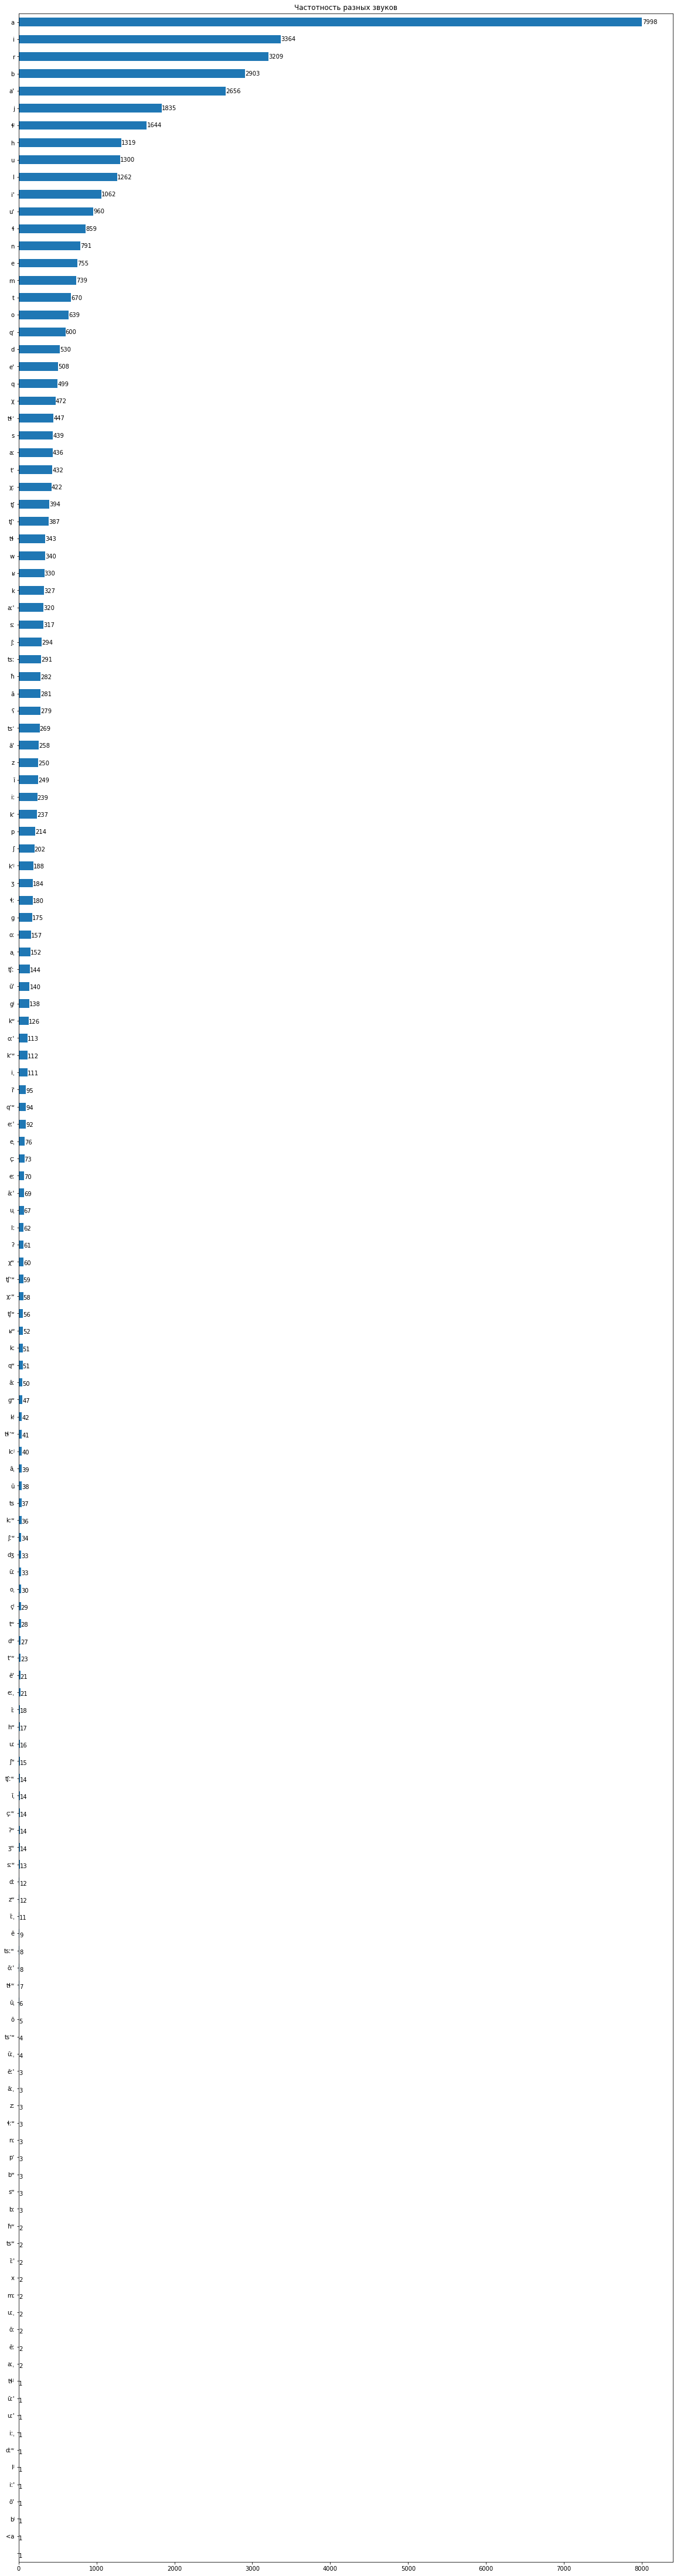

In [87]:
ax = df2[0].value_counts().sort_values(ascending=True).plot.barh()
plt.title('Частотность разных звуков')
plt.gcf().set_size_inches(20, 80)
for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_width() * 1.001,p.get_y() * 1.001))
plt.show()

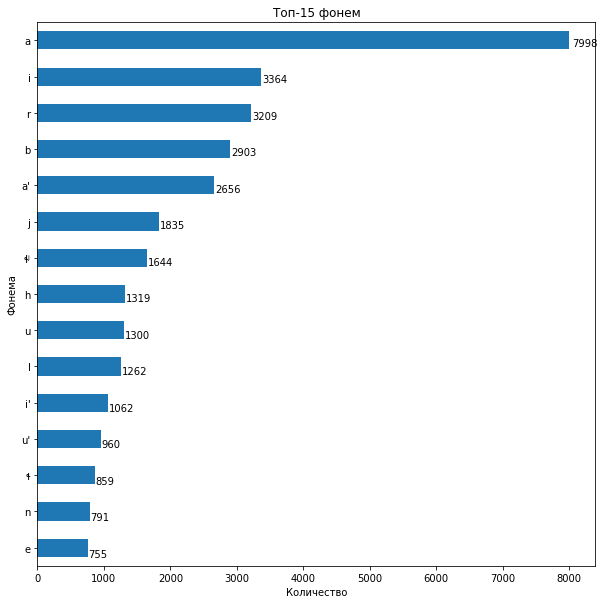

In [88]:
ax = df2[0].value_counts().sort_values(ascending=True).tail(15).plot.barh()
plt.title('Топ-15 фонем')
plt.gcf().set_size_inches(10, 10)
plt.xlabel('Количество')
plt.ylabel('Фонема')
for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_width() * 1.007,p.get_y() * 1.007))
plt.show()

In [89]:
vowels = [
 "aː'",
 'aːˌ',
 "̅aː'",
 "̅aːˌ",
 "̅a'",
 "̅aˌ",
 '̅a',
 "ā'",
 'āˌ',
 "āː'", 
 'āːˌ',
 "e'",
 #"e'",
 'eˌ',
 "eː'",
 'eːˌ',
 "i'",
 'iˌ',
 "iː'",
 'iːˌ',
 'o',
 'oˌ',
 "oː'",
 'oːˌ',
 "u'",
 'uˌ',
 "uː'",
 'uːˌ',
 'ã',
 "ã'",
 'ãˌ',
 'ãː',
 "ãː'",
 'ãːˌ',
 'õ',
 "õ'",
 'õˌ',
 'õː',
 "õː'",
 'õːˌ',
 'ĩ',
 "ĩ'",
 'ĩˌ',
 'ĩː',
 "ĩː'",
 'ĩːˌ',
 'ẽ',
 "ẽ'",
 'ẽˌ',
 'ẽː',
 "ẽː'",
 'ẽːˌ',
 'ũ',
 "ũ'",
 'ũˌ',
 'ũː',
 "ũː'",
 'ũːˌ',
 'a',
 "a'",
 'aˌ',
 'aː',
 'e',
 'eː',
 'i',
 'iː',
 'o',
 'oː',
 'u',
 'uː'
]

In [90]:
consonants = [
    'hʷ', 
    'kːʷ',
    'kʼʷ', 
    'kʼʷ', 
    'qʼʷ',
    'tɬʼʷ',
    'ɬːʷ',
    'tɬʷ',
    'tɬʷ', 
    'tɬʷ',
    'çːʷ',
    'ʁʷ',
    'tʃːʷ',
    'sːʷ',
    'tʼʷ', 
    'tʼʷ', 
    'tʼʷ',
    'qʷ',
    
    'ʕʷ',
    'ʕʷ',
    'ʕʷ',
    'bʲʷ',
    'bːʷ',
    'ɡʲʷ',
    'dːʷ',
    'dʒʷ',
    'zːʷ',
    'jːʷ',
    'tɬʲʷ',
    'kʼʲʷ',
    'kʼʲʷ',
    'kʼʲʷ', 
    'kʼʷ',
    'kːʲʷ',
    'kːʷ',
    'kʲʷ',
    'lʲʷ',
    'ɬʲʷ',
    'ɬʷ',
    'pʼʷ',
    'χːʷ',
    'çʲʷ', 
    'χʲʷ',
    'ħʷ',
    'ħʷ',
    'tsːʷ',
    'tsʼʷ',
    'tsʼʷ', 
    'tsʼʷ', 
    'tʃʼʷ', 
    'tʃʼʷ', 
    'tʃʼʷ', 
    'bʷ',
    'ɡʷ',
    'ʒʷ', 
    'zʷ',
    'jʷ',
    'kʷ',
    'pʷ', 
    'rʷ',
    'sʷ',
    'tʷ',
    'χʷ',
    'dʷ',
    'tsʷ',
    'tʃʷ',
    'ʃʷ',
    'ʃːʷ',
    'ʔʷ',
    
    'bʲ',
    'bː',
    'dː',
    'dʒ',
    'h',
    'kʲ',
    'kʼ',
    'kʼʲ',
    'kː',
    'kːʲ',
    'lʲ',
    'lː',
    'mː',
    'nː',
    'pʼ',
    'q',
    'qʼ',
    'sː',
    'tɬ',
    'tɬʲ',
    'tʼ',
    'tsʼ',
    'tsː',
    'tʃː',
    'tʃʼ',
    'wː',
    'çː',
    'çʲ',
    'zː',
    'ħ',
    'ɡʲ',
    'ɬ',
    'ɬʲ',
    'tɬʼ',
    'ɬː',
    'ʁ',
    'ʕ',
    'χʲ',
    'χː',
    'b',
    'd',
    'j',
    'k',
    'l',
    'm',
    'n',
    'p',
    'r',
    's',
    't',
    'ts',
    'tʃ',
    'w',
    'z',
    'ʃː',
    'ɡ',
    'ʃ',
    'ʒ',
    'ʔ',
    'χ'
]

In [91]:
len(vowels) + len(consonants)

198

### Статистика для гласных

In [26]:
vstat_dict = {}
vow = []

for i in phones:
    if i in vowels:
        vow.append(i)

vow_stat = collections.Counter(vow)

per_stat = []
for i in vow_stat.values():
    i = round(i/len(vow), 5)
    per_stat.append(i)

v = []
for i in vow_stat:
    v.append(i)
    
vstat_dict['vowel'] = v
vstat_dict['part'] = per_stat

df_vow = pd.DataFrame(data=vstat_dict)
df_vow

,vowel,part
0,i',0.04718
1,a,0.35529
2,i,0.14944
3,a',0.11799
4,e',0.02257
5,o,0.02839
6,iːˌ,0.00004
7,u,0.05775
8,aː,0.01937
9,u',0.04265


In [27]:
df_vow.to_csv('vow.csv') 

In [28]:
vow_phonems = [
 '̅a',
 'o',
 'ã',
 'ãː',
 'õ',
 'õː',
 'ĩ',
 'ĩː',
 'ẽ',
 'ẽː',
 'ũ',
 'ũː',
 'a',
 'aː',
 'e',
 'eː',
 'i',
 'iː',
 'oː',
 'u',
 'uː'
]

In [29]:
vstat_dict2 = {}
vow2 = []

for i in phones:
    if i in vow_phonems:
        vow2.append(i)

vow_stat2 = collections.Counter(vow2)

vph_stat = []
for i in vow_stat2.values():
    i = round(i/len(vow2), 5)
    vph_stat.append(i)

v2 = []
for i in vow_stat2:
    v2.append(i)
    
vstat_dict2['vowel phonem'] = v2
vstat_dict2['part'] = vph_stat

df_vow_ph = pd.DataFrame(data=vstat_dict2)
df_vow_ph

,vowel phonem,part
0,a,0.51070
1,i,0.21480
2,o,0.04080
3,u,0.08301
4,aː,0.02784
5,e,0.04821
6,iː,0.01526
7,ã,0.01794
8,oː,0.01002
9,ĩ,0.01590


In [30]:
df_vow_ph.to_csv('vow_ph.csv')

### Статистика для согласных

In [31]:
cstat_dict = {}
cons = []

for i in phones:
    if i in consonants:
        cons.append(i)

cons_stat = collections.Counter(cons)

per_stat2 = []
for i in cons_stat.values():
    i = round(i/len(cons), 5)
    per_stat2.append(i)

c = []
for i in cons_stat:
    c.append(i)
    
cstat_dict['consonant'] = c
cstat_dict['per'] = per_stat2

df_cons = pd.DataFrame(data=cstat_dict)
df_cons

,consonant,per
0,b,0.11020
1,sː,0.01203
2,ʒ,0.00698
3,l,0.04790
4,r,0.12181
...,...,...
86,bʲ,0.00004
87,dːʷ,0.00004
88,tɬʲ,0.00004
89,ħʷ,0.00008


In [32]:
df_cons.to_csv('cons.csv')

# Анализ слоговой структуры

In [92]:
initial = []
initial_sound = []

for var in tqdm(df_divided['phon']): #статистика инициалей разной длинны
    var = var.split('-')
    sound = ''
    k = 0
    for v in var:
        if v in consonants:
            sound += v
            k += 1 
        if v not in consonants:
            break
            
    initial.append(k)
    initial_sound.append(sound)
    
c2 = collections.Counter(initial)

s2 = [(k, c2[k]) for k in sorted(c2, key=c2.get, reverse=True)]
s2

[(1, 6589), (0, 930), (2, 5), (3, 1)]

In [93]:
for ins in range(len(initial_sound)): #делаем список инициалей
    if initial_sound[ins]=='':
        initial_sound[ins] = '#'

In [94]:
df3 = pd.DataFrame(data=s2)
df3.rename(columns={0 : 'initial_klaster', 1 : 'num'}, inplace=True)
df3

,initial_klaster,num
0,1,6589
1,0,930
2,2,5
3,3,1


Инициаль слога чаще всего состоит из одного согласного. Совсем редко она состоит из 2 или 3 согласных:

[d-r-r-u] - межд. тпру (возглас, которым останавливают лошадь) (3)

Лишь один пример, являющийся междометием. Отнесем его к исключениям.

[d-b-u] - межд. тпру (возглас, которым останавливают лошадь) (2)

[k-ʃ] - то же, что  курā́ (== межд. кыш (возглас, которым отгоняют кур)) (2)

[n-tsʼ-aː] - III   дет. вода; нцIā́ гвā  воды дай (2)

[r-r-oː-w] -   межд. бар-бар (подзывной клич, которым собирают овец) (2)

In [95]:
final = []
final_sound = []

for var in tqdm(df_divided['phon']): #статистика финалей разной длинны
    var = var.split('-')
    var.reverse()
    sound2 = ''
    q = 0
    for v in var:
        if v in consonants:
            sound2 += v
            q += 1 
        if v not in consonants:
            break

    final_sound.append(sound2[::-1])        
    final.append(q)

c4 = collections.Counter(final)
        
s3 = [(k, c4[k]) for k in sorted(c4, key=c4.get, reverse=True)]
s3

[(0, 4510), (1, 3008), (2, 7)]

In [96]:
for fin in range(len(final_sound)): #делаем список инициалей
    if final_sound[fin]=='':
        final_sound[fin] = '#'

In [97]:
df4 = pd.DataFrame(data=s3)
df4.rename(columns={0: 'final_klaster', 1: 'num'}, inplace=True)
df4

,final_klaster,num
0,0,4510
1,1,3008
2,2,7


Финаль слога чаще всего отсутствует (слово кончается на гласную). Реже финаль состоит из одной согласной, совсем редко из 2 или 3. Рассмотрим эти случаи:

[dʷ-a-r-ʁ] - звукоподражание грохоту падающей доски или балки (2)

[k-ʃ] - то же, что курā́ (== межд. кыш (возглас, которым отгоняют кур)) (2)

[m-e-r-k] - III  собственность; имущество;  дуб мéркӣ гьāᴴб это твоя собственность (2)

[ʃ-a-r-ʕ] - III  шариат;  шáргIила ракъōта согласно канонам шариата (2)

[ʕ-aː-j-b] -   III   1) вина, виновность; гIайи́м  гьикI’ув  безвинный;  гIā́мдā  гьикI’ḗлъ̅ӣ без вины;  гIайи́м тIāᴴйлъ’а  (несправедливо) обвинить кого-л.;  гIайи́м  бигъāйлъ’а  установить виновность; гIāм бáхъащилъ’а (/бáц̄агьилъ’а) выгораживать  кого-л. 2) укор, упрек, порицание;  гIā́м к̅вēлъ’а  упрекнуть кого-л.;  гIā́м игьилъ’а  укорять  кого-л.;  дил̅а гIāм игьáбас̅а  не обессудь;  ди́б олъ̅ила гIā́йм гьикI’и  я не обижаюсь на нее;  гIā́м игьилъ’а макIва гьикI’ýб хIалтIи безукоризненная работа (2)

[χ-aː-j-r] - III  польза; выгода; прибыль; хāйр и́йōб  а) полезный б) прибыльный;  хā́йр гьикI’уб  а) бесполезный б) не прибыльный;  хā́йр булIилъ’а (/бáхӣлъ’а)  выгадать в чем-л.;  хайи́р бехилъ’а   получать пользу (2)
 
[tʼ-ã-j-tʃʷ-tʼ-ã-j-tʃʷ] - межд. асю (возглас, которым подзывают или останавливают корову) (ТIАᴴЙЧВ-ТIАᴴЙЧВ) (2)

Здесь мы видим междометия, звуковосклицания, звукоподражания и несколько существительных. Все кроме существительных можно было бы исключить. Что касается существительных, в их финаль входит r и j, возможно они повлияли на длину финали. В целом, случаев немного, так что скорее стоит отнести их к исключениям.

In [98]:
df_divided['initial'] = initial_sound
df_divided['final'] = final_sound
df_divided = df_divided[['lemm', 'phon', 'morph', 'trans', 'initial', 'final', 'loanwords', 'tag']]
df_divided

,lemm,phon,morph,trans,initial,final,loanwords,tag
0,АБ,a-b,"(ав I, ай II, áби мн. I, ар мн. II; ащýб I,...","мест. указ. этот, эта, это (указывает на о...",#,b,0,"[[[АБ ]], [(, [ав ]], [I], [, , [ай], \n], [..."
1,ÁБА,a'-b-a,"(-лIа, -иби)",III плита (каменная); аби́балIа щи́би ст...,#,#,0,"[[[ÁБА]], [ ], [III], [ (, [-л]], [[I]], [[а,\..."
2,АБÁ,a-b-a',"(авá I, айá II, аби́ мн. I, арá мн. II)","частица указ. вот (указывает на объект, на...",#,#,0,"[[[АБÁ]], [ (, [авá], \n], [I], [, , [айá], ..."
3,АБÁВ,a-b-a'-w,no info,частица указ. вот (обращает внимание мужчи...,#,w,0,"[[[АБÁВ ]], [[частица\nуказ. ]], [вот (, [об..."
4,АБАДḖЛIА,a-b-a-d-eː'-tɬ-a,no info,"1) старый, давно известный; абадḗлIа хабá...",#,#,0,"[[[АБАД]], [Ë], [[Л]], [[I]], [[А]], [ 1) ста..."
...,...,...,...,...,...,...,...,...
7520,Э̄́ЙЛЪ’А,eː'-j-ɬʲ-a,"(элáло, элáлā, элалá, элáло / элáлō­та, элáлā)","понуд. 1) заквашивать, доводить до сверты...",#,#,0,"[[°], [[ЙЛЪ’А ]], \n, [ (, []], [[элáло, элáлā..."
7521,Э́ЛĀЙЛЪ’А,e'-l-aː-j-ɬʲ-a,"(элáло, элáлā, элалá, элáло / элáлō­та, элáлā)","понуд. 1) заквашивать, доводить до сверты...",#,#,0,"[[²], [[ЛĀЙЛЪ’А ]], \n, [ (, []], [[элáло, элá..."
7522,Э̄́ЛЪ’А¹,eː'-ɬʲ-a,"(э́во, -ā́, эбакьá, э̀во/эвṓта, -ā́/áрахъа)",1) свертываться; щӯ эвṓ молоко свернулось;...,#,#,0,"[[°], [[ЛЪ’А, <sup>1</sup>]], [ (, []], [«], [..."
7523,Э̄̀ЛЪ’А²,eːˌ-ɬʲ-a,"(э̀во, ā́, э́во/эвṓта, -ā́)",опираться на что-л. гIаᴴсá э̄лъ’а опира...,#,#,0,"[[±], [[ЛЪ’А, <sup>2</sup>, ]], \n, [ (, []],..."


## Что может составлять инициаль и финаль

### Совместная статистика

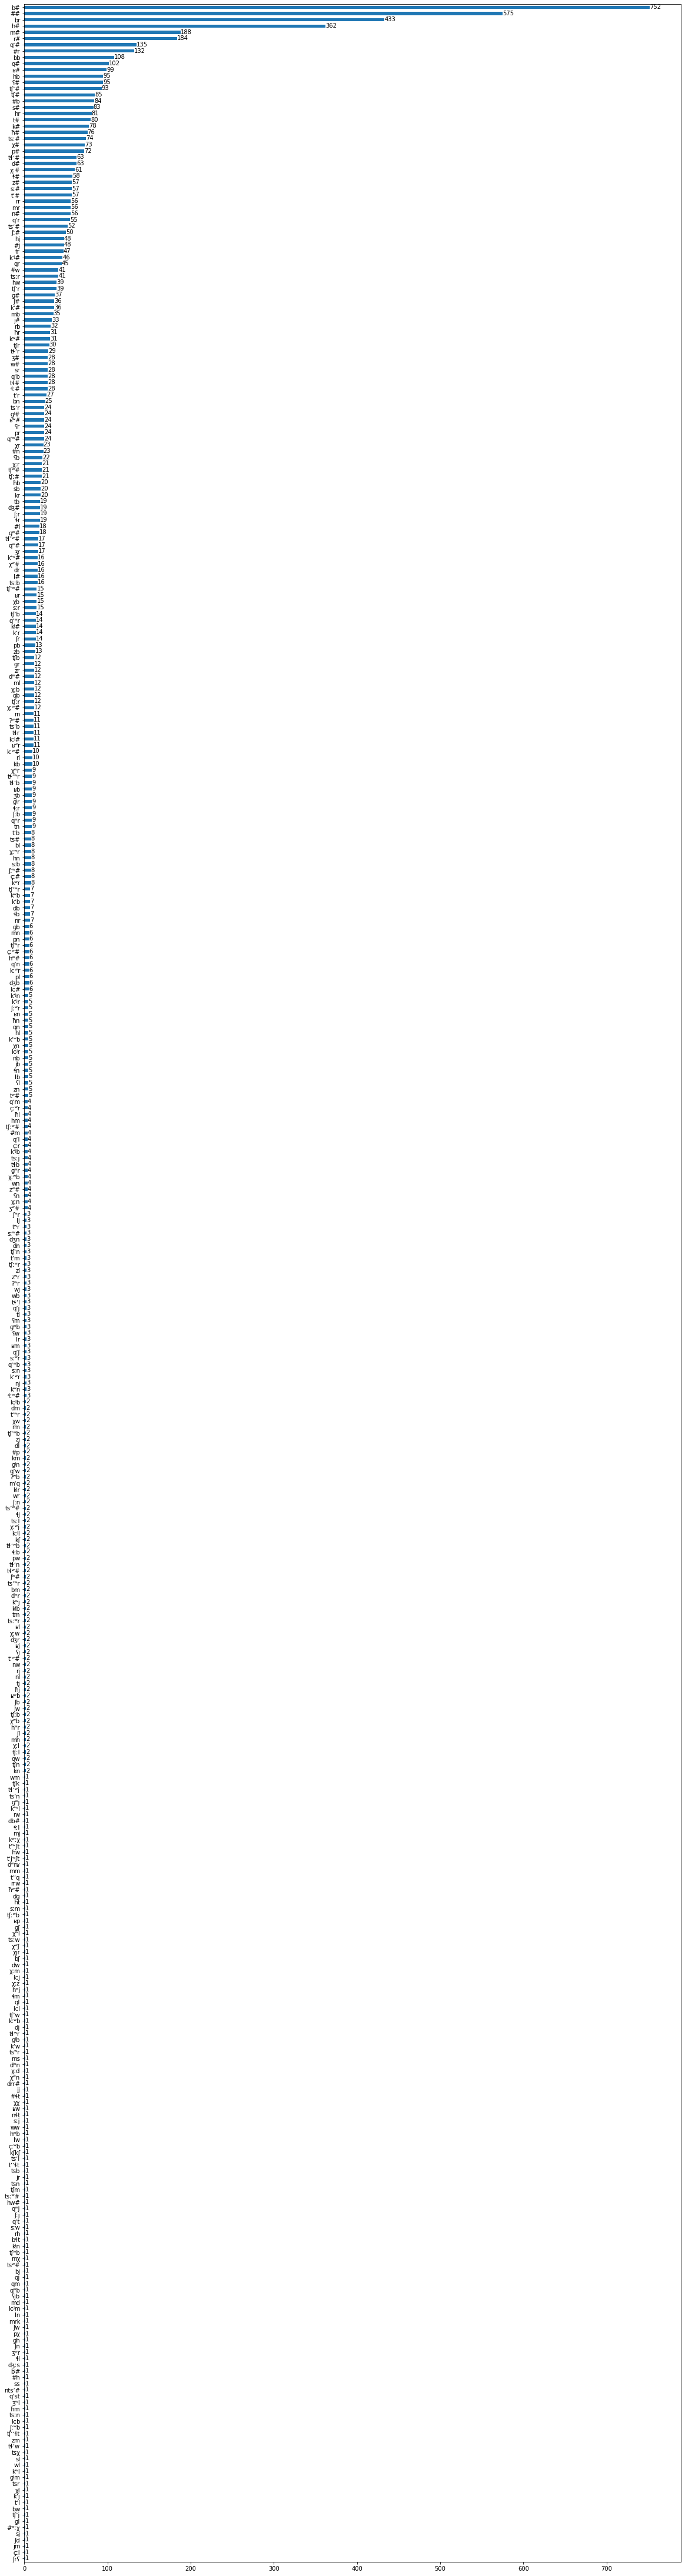

In [99]:
df_common = df_divided['initial']+df_divided['final']
ax = df_common.value_counts().sort_values(ascending=True).plot.barh()
plt.gcf().set_size_inches(20, 80)
for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_width(),p.get_y()))

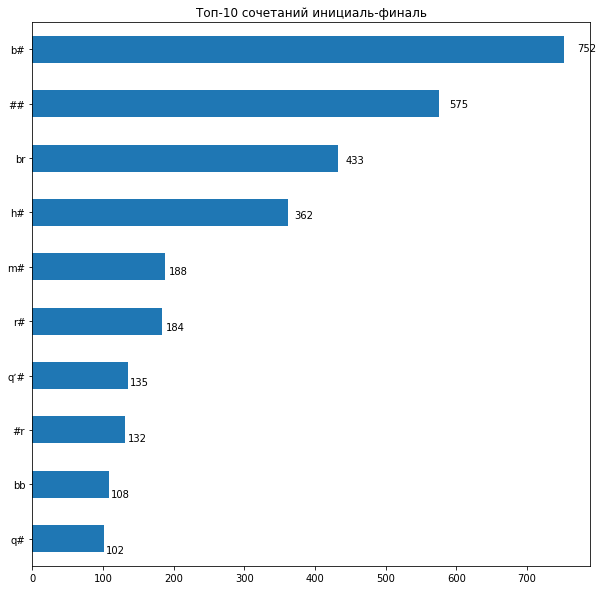

In [100]:
df_common = df_divided['initial']+df_divided['final']
ax = df_common.value_counts().sort_values(ascending=True).tail(10).plot.barh()
plt.gcf().set_size_inches(10, 10) 
plt.title('Топ-10 сочетаний инициаль-финаль')
for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_width() * 1.025,p.get_y() * 1.025))

### Отдельная статистика

In [101]:
c_initial = collections.Counter(initial_sound)
c_final = collections.Counter(final_sound)
c_initial = [(k, c_initial[k]) for k in sorted(c_initial, key=c_initial.get, reverse=True)] #статистика инициалей в числах
c_final = [(k, c_final[k]) for k in sorted(c_final, key=c_final.get, reverse=True)] #статистика финалей в числах

In [102]:
c_initial

[('b', 1332),
 ('#', 930),
 ('h', 642),
 ('m', 307),
 ('r', 299),
 ('qʼ', 241),
 ('q', 170),
 ('t', 162),
 ('ʕ', 159),
 ('tʃʼ', 152),
 ('ħ', 141),
 ('tsː', 139),
 ('ʁ', 137),
 ('s', 134),
 ('tʃ', 131),
 ('p', 124),
 ('χ', 121),
 ('k', 114),
 ('tɬʼ', 107),
 ('χː', 105),
 ('tʼ', 100),
 ('d', 96),
 ('z', 93),
 ('ɬ', 93),
 ('tsʼ', 89),
 ('sː', 86),
 ('ʃː', 81),
 ('n', 76),
 ('kʼʲ', 60),
 ('kʼ', 59),
 ('ɡ', 58),
 ('ʃ', 58),
 ('ʒ', 54),
 ('kʷ', 53),
 ('w', 43),
 ('j', 43),
 ('tɬ', 43),
 ('qʼʷ', 41),
 ('ɬː', 40),
 ('ɡʲ', 37),
 ('ʁʷ', 37),
 ('tʃː', 37),
 ('dʒ', 31),
 ('χʷ', 30),
 ('tɬʼʷ', 29),
 ('l', 29),
 ('qʷ', 28),
 ('tʃʷ', 28),
 ('ɡʷ', 26),
 ('χːʷ', 26),
 ('kʼʷ', 25),
 ('tʃʼʷ', 24),
 ('kːʲ', 21),
 ('kʲ', 19),
 ('kːʷ', 17),
 ('dʷ', 16),
 ('ʔʷ', 16),
 ('ʃːʷ', 14),
 ('çː', 13),
 ('ts', 12),
 ('çːʷ', 11),
 ('hʷ', 10),
 ('kː', 9),
 ('tʷ', 8),
 ('tʃːʷ', 8),
 ('zʷ', 7),
 ('ʒʷ', 6),
 ('sːʷ', 6),
 ('ʃʷ', 5),
 ('tʼʷ', 4),
 ('tsʼʷ', 4),
 ('ɬːʷ', 3),
 ('tɬʷ', 3),
 ('tsːʷ', 3),
 ('tsʷ', 2),
 ('bʲ', 1),

In [103]:
c_final

[('#', 4510),
 ('r', 1626),
 ('b', 754),
 ('n', 174),
 ('j', 145),
 ('l', 112),
 ('w', 111),
 ('m', 43),
 ('ʃ', 8),
 ('h', 5),
 ('χ', 4),
 ('ɬt', 3),
 ('p', 3),
 ('ʼq', 3),
 ('d', 3),
 ('s', 2),
 ('ʼɬt', 2),
 ('ʷːχ', 1),
 ('jb', 1),
 ('rʁ', 1),
 ('ɡ', 1),
 ('ːs', 1),
 ('ːχ', 1),
 ('kʃ', 1),
 ('st', 1),
 ('rk', 1),
 ('jʷʃt', 1),
 ('ʷʃt', 1),
 ('jr', 1),
 ('z', 1),
 ('ʼt', 1),
 ('t', 1),
 ('k', 1),
 ('rʕ', 1)]

In [104]:
df5 = pd.DataFrame(data=initial_sound)

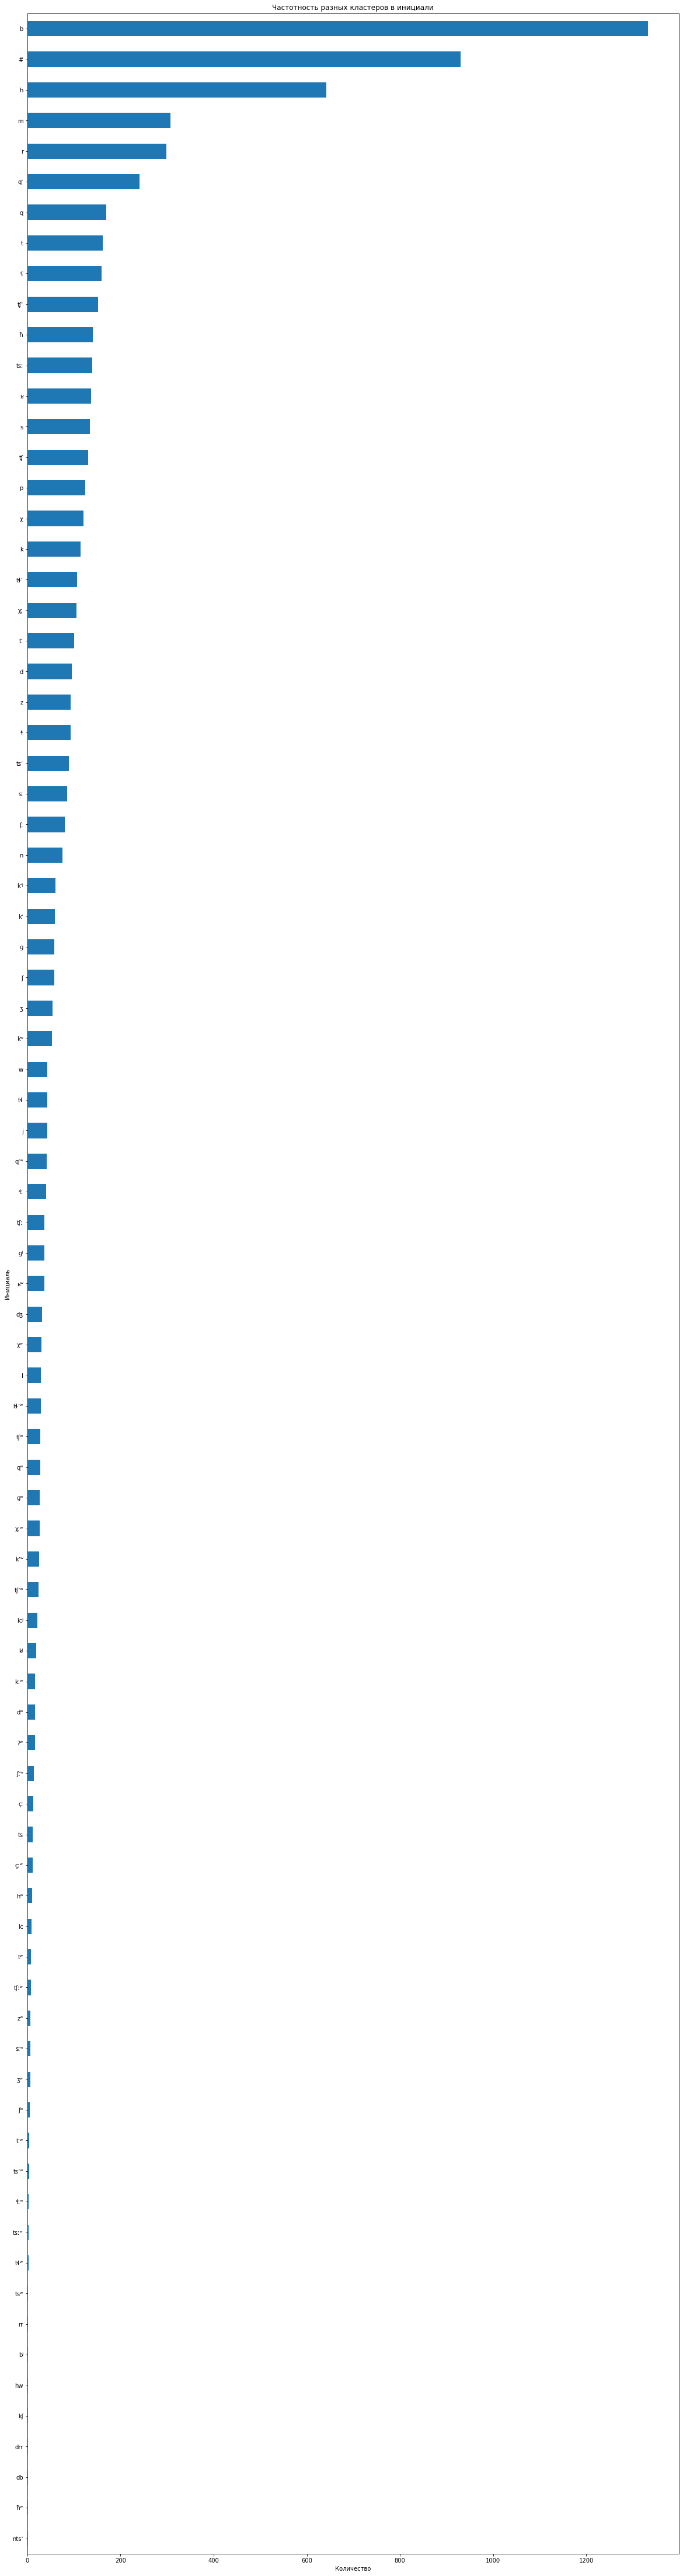

In [105]:
ax = df5[0].value_counts().sort_values(ascending=True).plot.barh() #частотность кластеров инициали
plt.title('Частотность разных кластеров в инициали')
plt.gcf().set_size_inches(20, 80)
plt.xlabel('Количество')
plt.ylabel('Инициаль')
plt.show()
for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_width(),p.get_y()))

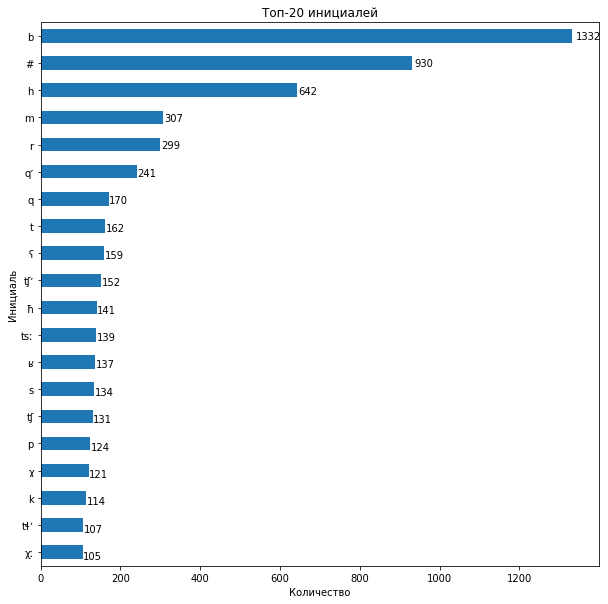

In [106]:
ax = df5[0].value_counts().sort_values(ascending=True).tail(20).plot.barh() #частотность кластеров инициали
plt.title('Топ-20 инициалей')
plt.gcf().set_size_inches(10, 10)
plt.xlabel('Количество')
plt.ylabel('Инициаль')
for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_width() * 1.007,p.get_y() * 1.007))
plt.show()

In [107]:
df6 = pd.DataFrame(data=final_sound)

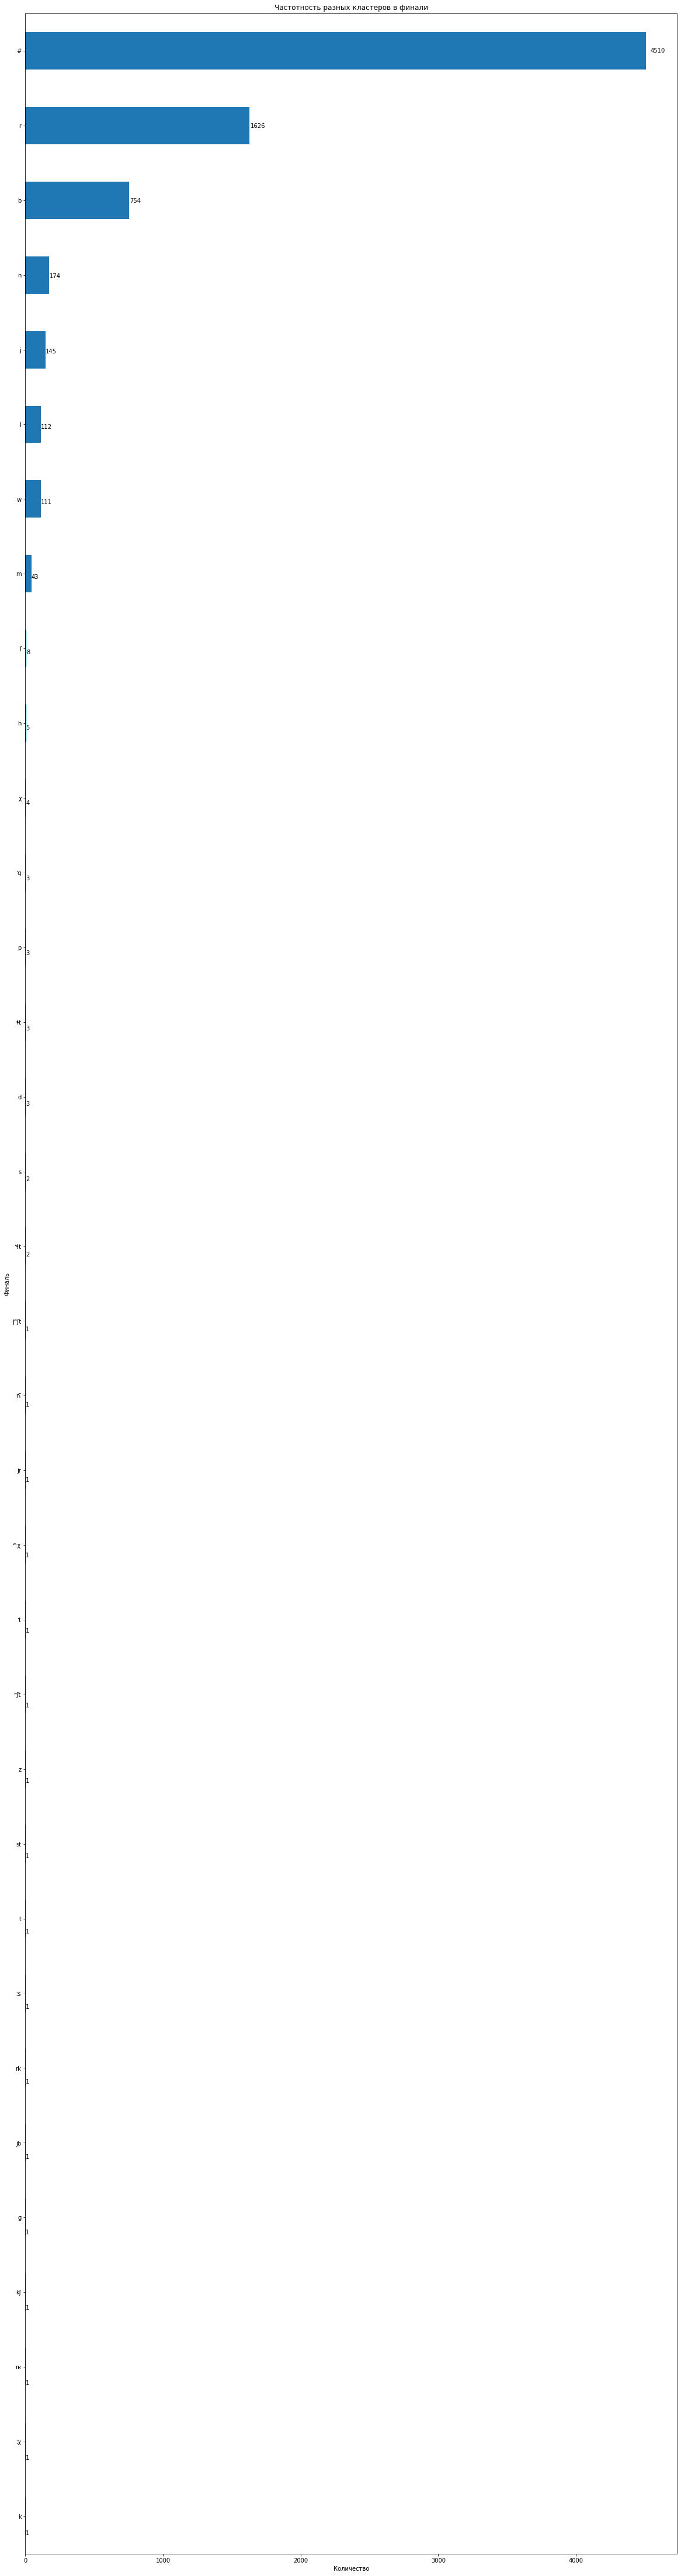

In [108]:
ax = df6[0].value_counts().sort_values(ascending=True).plot.barh() #частотность кластеров инициали
plt.title('Частотность разных кластеров в финали')
plt.gcf().set_size_inches(20, 80)
plt.xlabel('Количество')
plt.ylabel('Финаль')
for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_width() * 1.007,p.get_y() * 1.007))
plt.show()

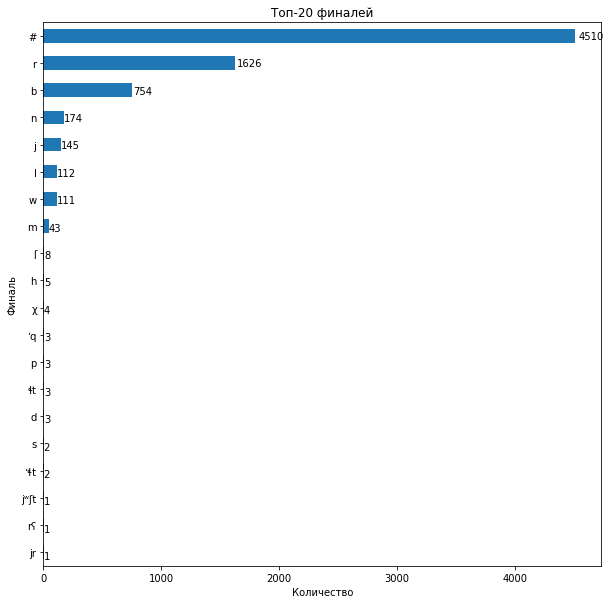

In [109]:
ax = df6[0].value_counts().sort_values(ascending=True).tail(20).plot.barh() #частотность кластеров инициали
plt.title('Топ-20 финалей')
plt.gcf().set_size_inches(10, 10)
plt.xlabel('Количество')
plt.ylabel('Финаль')
for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_width() * 1.007,p.get_y() * 1.007))
plt.show()

# CV

### Интервокальные кластеры

In [51]:
intervoc = []
intervoc_len = []
one_cons = []
two_cons = []
three_cons = []
four_cons = []

for var in df_divided['phon']:
    var = var.split('-')
    for v in range(len(var)):
        if var[v] in vowels or var[v]=='a':
            var[v] = '00'
    var_string = ''
    for v in var:
        var_string += v + '-'
    var_string = var_string[:-1]
    clasters = re.findall(r'0-(.+?)-0', var_string, flags=re.DOTALL)
    if clasters:
        intervoc_line = []
        for c in clasters:
            c = c.replace('00-', '')
            c = c.replace('00', '')
            intervoc_line.append(c.split('-'))
        intervoc.append(intervoc_line)
        
    else:
        intervoc.append('')

for i in intervoc:
    for j in i:
        l = len(j)
        intervoc_len.append(l)
        if l==1:
            one_cons.append(j[0])
        if l==2:
            two_cons.append(j[0]+j[1])
        if l==3:
            three_cons.append(j[0]+j[1]+j[2])
    

In [52]:
print(len(one_cons))
print(len(two_cons))
print(len(three_cons))

13580
1913
5


In [53]:
print(len(one_cons)+len(two_cons)+len(three_cons))

15498


In [54]:
df_inter = pd.DataFrame(['13581', '1913', '5'], ['1', '2', '3'])
df_inter

,0
1,13581
2,1913
3,5


In [55]:
one_c = collections.Counter(one_cons)
one_c = [(k, one_c[k]) for k in sorted(one_c, key=one_c.get, reverse=True)] #статистика одинарных интервокальных кластеров
one_c

[('ɬʲ', 1161),
 ('j', 1019),
 ('l', 991),
 ('r', 786),
 ('h', 654),
 ('ɬ', 651),
 ('b', 649),
 ('n', 522),
 ('t', 453),
 ('qʼ', 327),
 ('tʼ', 316),
 ('χː', 315),
 ('tɬʼ', 312),
 ('χ', 307),
 ('q', 289),
 ('m', 277),
 ('tɬ', 267),
 ('s', 253),
 ('tʃ', 251),
 ('d', 224),
 ('tʃʼ', 221),
 ('ʃː', 201),
 ('sː', 194),
 ('tsʼ', 175),
 ('ʁ', 173),
 ('tsː', 163),
 ('kʼ', 157),
 ('k', 154),
 ('w', 144),
 ('kʼʲ', 125),
 ('ʒ', 120),
 ('z', 118),
 ('ɬː', 115),
 ('ʕ', 105),
 ('ɡʲ', 99),
 ('tʃː', 97),
 ('ħ', 96),
 ('ɡ', 93),
 ('kʼʷ', 85),
 ('p', 75),
 ('ʃ', 75),
 ('kʷ', 69),
 ('lː', 68),
 ('ʔ', 59),
 ('qʼʷ', 47),
 ('çː', 46),
 ('kː', 40),
 ('tʃʼʷ', 34),
 ('χːʷ', 33),
 ('χʷ', 30),
 ('çʲ', 29),
 ('kʲ', 24),
 ('qʷ', 24),
 ('tʃʷ', 23),
 ('tʼʷ', 21),
 ('ɡʷ', 19),
 ('tʷ', 18),
 ('kːʷ', 18),
 ('kːʲ', 18),
 ('ts', 16),
 ('ʁʷ', 14),
 ('ʃːʷ', 14),
 ('', 14),
 ('tɬʼʷ', 12),
 ('dː', 12),
 ('ʒʷ', 7),
 ('tʃːʷ', 6),
 ('tsːʷ', 5),
 ('hʷ', 5),
 ('tɬʷ', 4),
 ('sːʷ', 4),
 ('dʷ', 4),
 ('zʷ', 4),
 ('ʃʷ', 4),
 ('sʷ', 3),
 

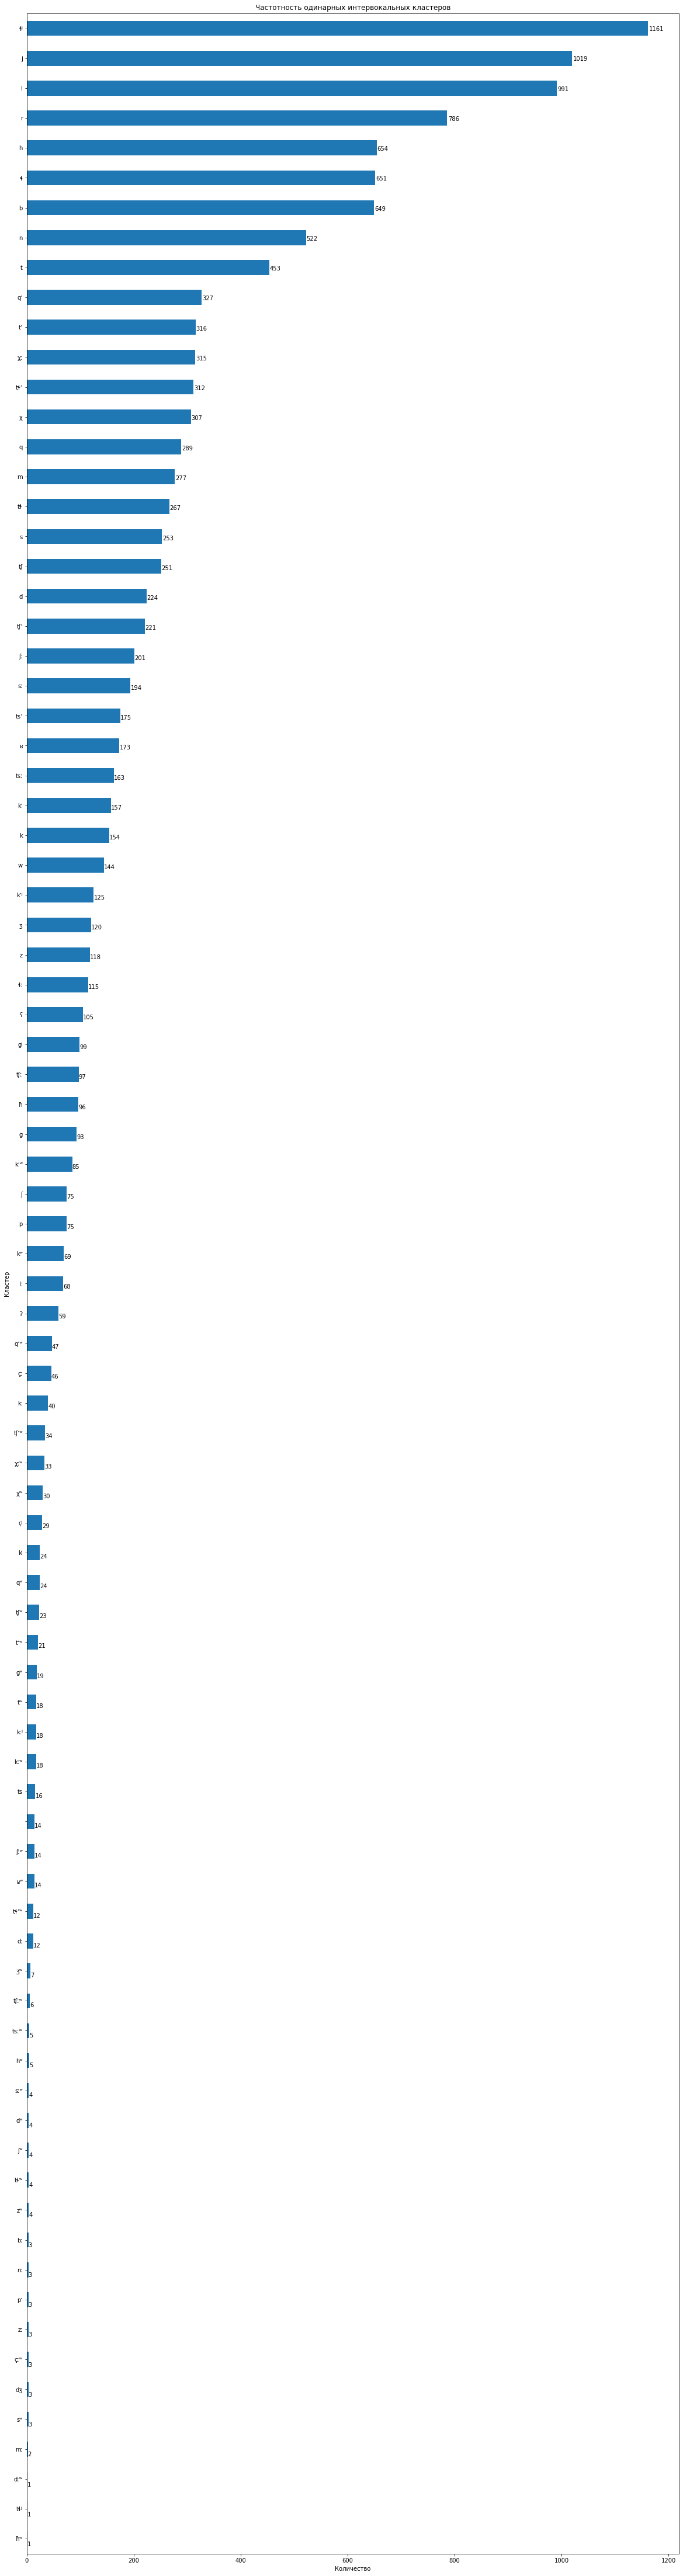

In [56]:
df7 = pd.DataFrame(data=one_cons)
ax = df7[0].value_counts().sort_values(ascending=True).plot.barh() 
plt.title('Частотность одинарных интервокальных кластеров')
plt.gcf().set_size_inches(20, 80)
plt.xlabel('Количество')
plt.ylabel('Кластер')
for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_width() * 1.002,p.get_y() * 1.002))

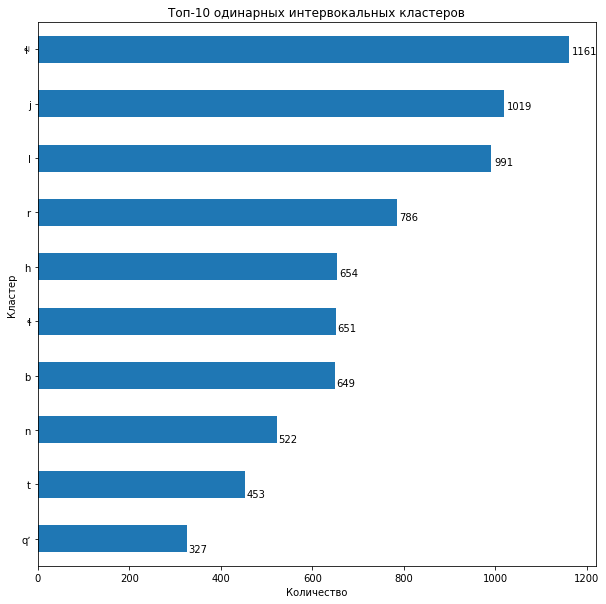

In [57]:
df7 = pd.DataFrame(data=one_cons)
ax = df7[0].value_counts().sort_values(ascending=True).tail(10).plot.barh() 
plt.title('Топ-10 одинарных интервокальных кластеров')
plt.gcf().set_size_inches(10, 10)
plt.xlabel('Количество')
plt.ylabel('Кластер')
for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_width() * 1.006,p.get_y() * 1.019))

In [58]:
two_c = collections.Counter(two_cons)
two_c = [(k, two_c[k]) for k in sorted(two_c, key=two_c.get, reverse=True)] #статистика двойных интервокальных кластеров
two_c

[('jɬʲ', 537),
 ('rd', 98),
 ('bd', 66),
 ('lɬ', 39),
 ('rɬ', 33),
 ('ʃt', 29),
 ('rtɬ', 28),
 ('rk', 28),
 ('rtɬʼ', 27),
 ('bsː', 22),
 ('jɬ', 21),
 ('rχ', 20),
 ('rkʼ', 20),
 ('rʁ', 20),
 ('rb', 19),
 ('mɬ', 19),
 ('rq', 19),
 ('rt', 18),
 ('rz', 17),
 ('rm', 16),
 ('rqʼ', 15),
 ('lm', 13),
 ('ʃːd', 13),
 ('rtʃʼ', 12),
 ('jl', 12),
 ('lb', 11),
 ('bɬː', 11),
 ('rp', 10),
 ('rχː', 10),
 ('rçː', 10),
 ('jb', 9),
 ('rtʃ', 9),
 ('bl', 9),
 ('bq', 9),
 ('lh', 9),
 ('rtsʼ', 8),
 ('rɡ', 8),
 ('rʃː', 8),
 ('sr', 8),
 ('rtʼ', 8),
 ('ltʼ', 8),
 ('mr', 7),
 ('bɡ', 7),
 ('rħ', 7),
 ('jr', 7),
 ('jh', 7),
 ('rh', 7),
 ('zm', 7),
 ('bqʼ', 7),
 ('ħm', 7),
 ('ns', 7),
 ('btʃː', 7),
 ('jχː', 6),
 ('nh', 6),
 ('bɬ', 6),
 ('ʃm', 6),
 ('qʼs', 6),
 ('st', 6),
 ('ld', 5),
 ('kʼw', 5),
 ('lʕ', 5),
 ('lɬː', 5),
 ('jm', 5),
 ('lq', 5),
 ('sq', 5),
 ('χt', 5),
 ('rqʼʷ', 5),
 ('ħk', 5),
 ('lçː', 5),
 ('km', 5),
 ('bʃ', 5),
 ('jd', 4),
 ('ɬːɡ', 4),
 ('bħ', 4),
 ('sːk', 4),
 ('rs', 4),
 ('jz', 4),
 ('rdʷ', 4),
 

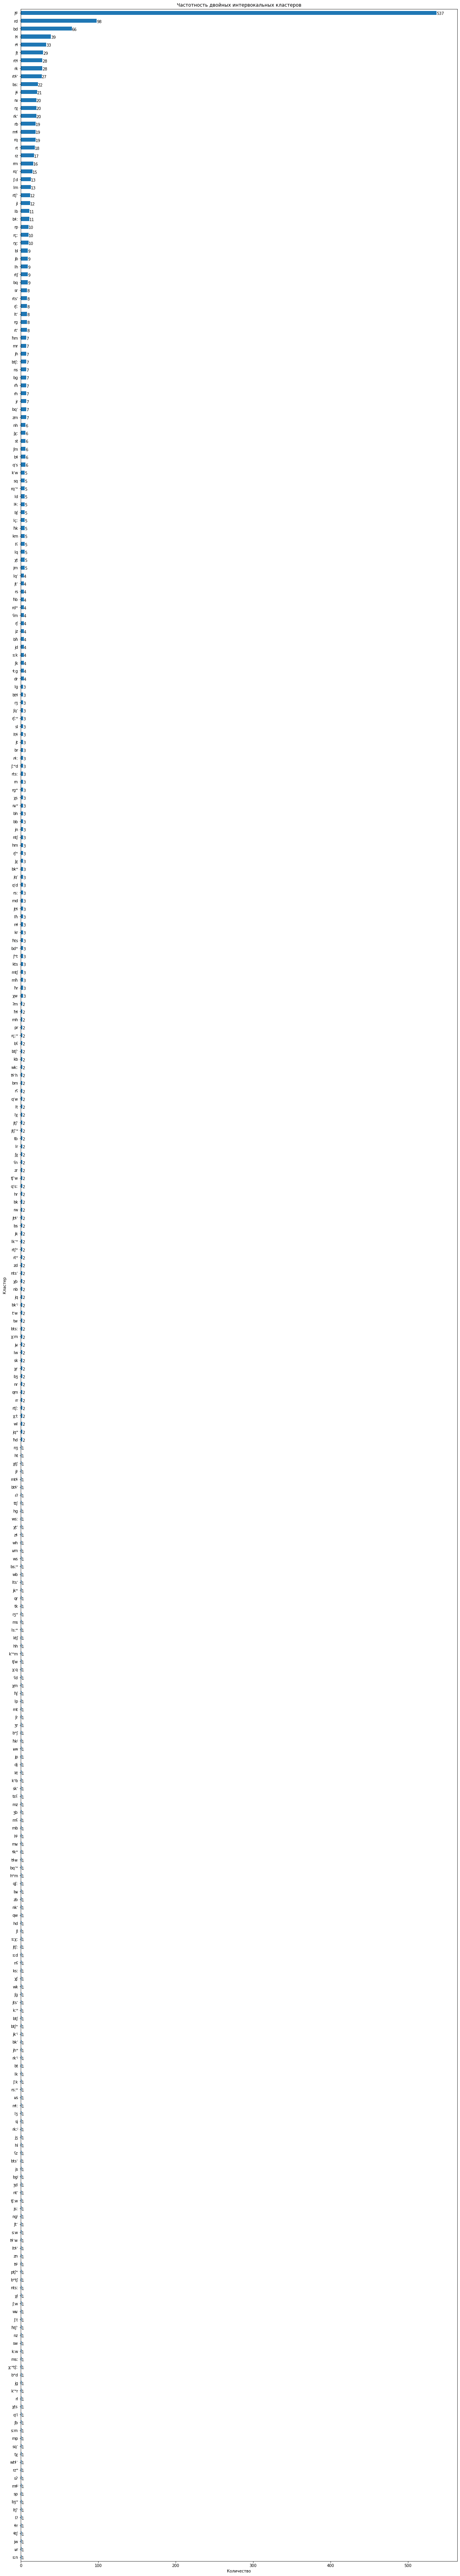

In [59]:
df8 = pd.DataFrame(data=two_cons)
ax = df8[0].value_counts().sort_values(ascending=True).plot.barh()
plt.title('Частотность двойных интервокальных кластеров')
plt.gcf().set_size_inches(20, 120)
plt.xlabel('Количество')
plt.ylabel('Кластер')
for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_width(),p.get_y()))

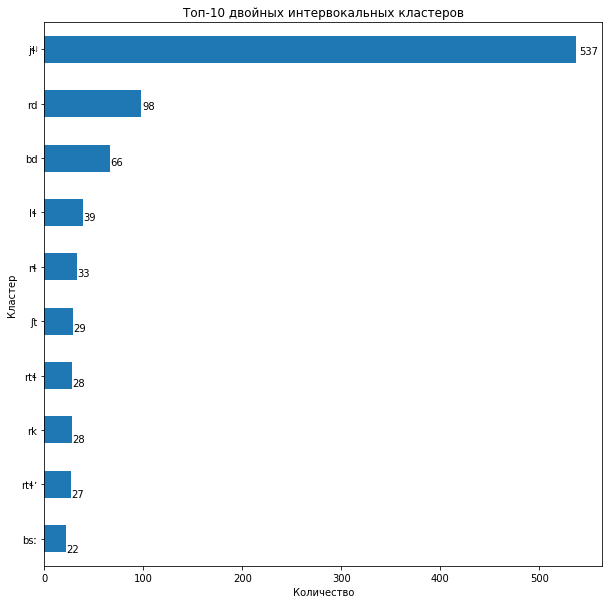

In [60]:
df8 = pd.DataFrame(data=two_cons)
ax = df8[0].value_counts().sort_values(ascending=True).tail(10).plot.barh()
plt.title('Топ-10 двойных интервокальных кластеров')
plt.gcf().set_size_inches(10, 10)
plt.xlabel('Количество')
plt.ylabel('Кластер')
for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_width() * 1.006,p.get_y() * 1.019))

In [61]:
three_c = collections.Counter(three_cons)
three_c = [(k, three_c[k]) for k in sorted(three_c, key=three_c.get, reverse=True)] #статистика тройных интервокальных кластеров
three_c

[('jmɬ', 2), ('jtʃʷtʼ', 1), ('jrkʼʲ', 1), ('jrh', 1)]

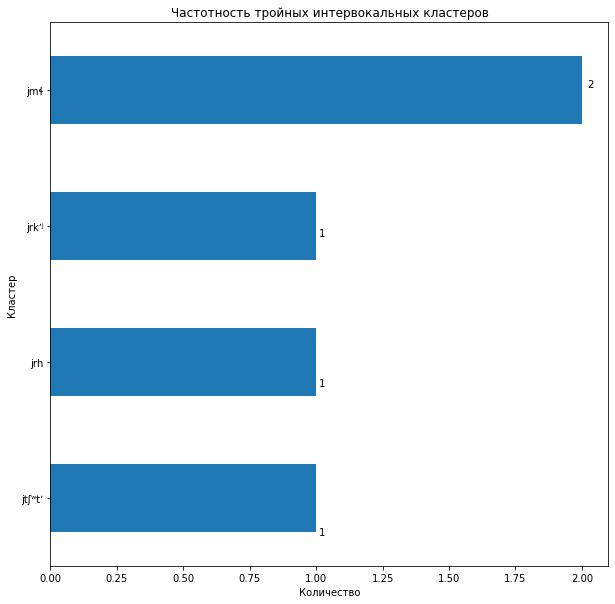

In [62]:
df9 = pd.DataFrame(data=three_cons)
ax = df9[0].value_counts().sort_values(ascending=True).plot.barh() 
plt.title('Частотность тройных интервокальных кластеров')
plt.gcf().set_size_inches(10, 10)
plt.xlabel('Количество')
plt.ylabel('Кластер')
for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_width() * 1.01,p.get_y() * 1.1))
plt.show()

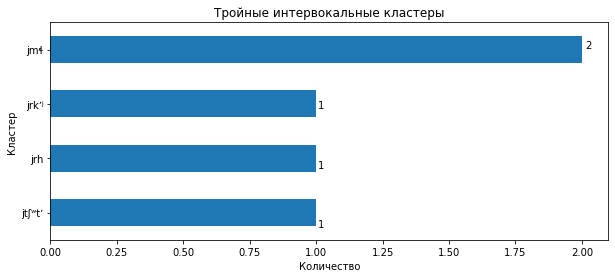

In [63]:
df9 = pd.DataFrame(data=three_cons)
ax = df9[0].value_counts().sort_values(ascending=True).tail(10).plot.barh() 
plt.title('Тройные интервокальные кластеры')
plt.gcf().set_size_inches(10, 4)
plt.xlabel('Количество')
plt.ylabel('Кластер')
for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_width() * 1.007,p.get_y() * 1.1))

In [64]:
df_divided['intervoc cluster'] = intervoc
df_divided = df_divided[['lemm', 'phon', 'morph', 'trans', 'initial', 'final', 'intervoc cluster', 'loanwords', 'tag']]
df_divided

,lemm,phon,morph,trans,initial,final,intervoc cluster,loanwords,tag
0,АБ,a-b,"(ав I, ай II, áби мн. I, ар мн. II; ащýб I,...","мест. указ. этот, эта, это (указывает на о...",#,b,,0,"[[[АБ ]], [(, [ав ]], [I], [, , [ай], \n], [..."
1,ÁБА,a'-b-a,"(-лIа, -иби)",III плита (каменная); аби́балIа щи́би ст...,#,#,[[b]],0,"[[[ÁБА]], [ ], [III], [ (, [-л]], [[I]], [[а,\..."
2,АБÁ,a-b-a',"(авá I, айá II, аби́ мн. I, арá мн. II)","частица указ. вот (указывает на объект, на...",#,#,[[b]],0,"[[[АБÁ]], [ (, [авá], \n], [I], [, , [айá], ..."
3,АБÁВ,a-b-a'-w,no info,частица указ. вот (обращает внимание мужчи...,#,w,[[b]],0,"[[[АБÁВ ]], [[частица\nуказ. ]], [вот (, [об..."
4,АБАДḖЛIА,a-b-a-d-eː'-tɬ-a,no info,"1) старый, давно известный; абадḗлIа хабá...",#,#,"[[b], [d], [tɬ]]",0,"[[[АБАД]], [Ë], [[Л]], [[I]], [[А]], [ 1) ста..."
...,...,...,...,...,...,...,...,...,...
7520,Э̄́ЙЛЪ’А,eː'-j-ɬʲ-a,"(элáло, элáлā, элалá, элáло / элáлō­та, элáлā)","понуд. 1) заквашивать, доводить до сверты...",#,#,"[[j, ɬʲ]]",0,"[[°], [[ЙЛЪ’А ]], \n, [ (, []], [[элáло, элáлā..."
7521,Э́ЛĀЙЛЪ’А,e'-l-aː-j-ɬʲ-a,"(элáло, элáлā, элалá, элáло / элáлō­та, элáлā)","понуд. 1) заквашивать, доводить до сверты...",#,#,"[[l], [j, ɬʲ]]",0,"[[²], [[ЛĀЙЛЪ’А ]], \n, [ (, []], [[элáло, элá..."
7522,Э̄́ЛЪ’А¹,eː'-ɬʲ-a,"(э́во, -ā́, эбакьá, э̀во/эвṓта, -ā́/áрахъа)",1) свертываться; щӯ эвṓ молоко свернулось;...,#,#,[[ɬʲ]],0,"[[°], [[ЛЪ’А, <sup>1</sup>]], [ (, []], [«], [..."
7523,Э̄̀ЛЪ’А²,eːˌ-ɬʲ-a,"(э̀во, ā́, э́во/эвṓта, -ā́)",опираться на что-л. гIаᴴсá э̄лъ’а опира...,#,#,[[ɬʲ]],0,"[[±], [[ЛЪ’А, <sup>2</sup>, ]], \n, [ (, []],..."


In [65]:
df_divided.to_csv('tindin.csv')

# Анализ ударений

In [66]:
strong_stress = [ 
 "aː'",
 "̅aː'",
 "̅a'",
 '̅a',
 "ā'",
 "āː'", 
 "e'",
 "eː'",
 "i'",
 "iː'",
 "oː'",
 "u'",
 "uː'",
 "ã'",
 "ãː'",
 "õ'",
 "õː'",
 "ĩ'",
 "ĩː'",
 "ẽ'",
 "ẽː'",
 "ũ'",
 "ũː'",
 "a'"
]

In [67]:
weak_stress = [
 'aːˌ',
 "̅aːˌ",
 "̅aˌ",
 'āˌ',
 'āːˌ',
 'eˌ',
 'eːˌ',
 'iˌ',
 'iːˌ',
 'oˌ',
 'oːˌ',
 'uˌ',
 'uːˌ',
 'ãˌ',
 'ãːˌ',
 'õˌ',
 'õːˌ',
 'ĩˌ',
 'ĩːˌ',
 'ẽˌ',
 'ẽːˌ',
 'ũˌ',
 'ũːˌ',
 'aˌ'
]

### Сильные ударения

In [68]:
syl_num = []
stress_slot = []
strong = {}

for var in df_divided['phon']:
    var = var.split('-')
    word = []
    for v in var:
        if v in vowels:
            word.append(v)
    syl_num.append(len(word))
    
    c = 0
    for w in word:
        if w in strong_stress:
            stress_slot.append(c+1)
            break
        c+=1
    if c == len(word):
        stress_slot.append('no stress')
        
strong['syl_num'] = syl_num
strong['stress_slot'] = stress_slot

In [69]:
set(syl_num)

{0, 1, 2, 3, 4, 5, 6, 7, 8}

В случае где 0 слогов только одно слово:
    
КШ - то же, что курā́ (== межд. кыш (возглас, которым отгоняют кур)) [k-ʂ] 

Междометие => смело можно исключить

Только 1 случай где 8 слогов (а значит выборка по таким словам не релевантна):

ДЖААГЬАᴴДАПАС̅АБАХЪА (ВОЛIИБА!) - иди (ты) в тартарары!

Слов с 7 слогами тоже совсем мало - всего 6 штук.

In [70]:
df_strong = pd.DataFrame(strong)

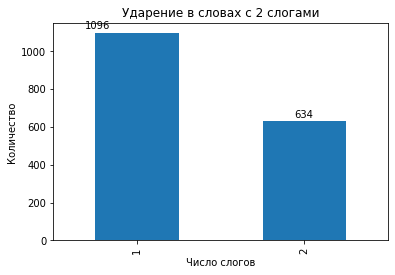

In [71]:
ax = df_strong[
    (df_strong['syl_num'] == 2) & (df_strong['stress_slot'] != 'no stress')
]['stress_slot'].value_counts(sort=False).plot.bar()
plt.title('Ударение в словах с 2 слогами')
plt.xlabel('Число слогов')
plt.ylabel('Количество')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.25,p.get_height() * 1.02))

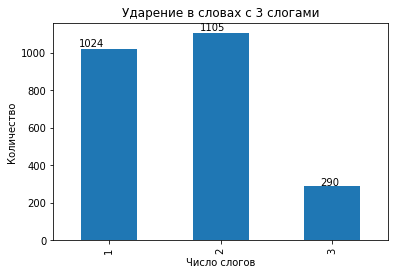

In [72]:
ax = df_strong[
    (df_strong['syl_num'] == 3) & (df_strong['stress_slot'] != 'no stress')
]['stress_slot'].value_counts(sort=False).plot.bar()
plt.title('Ударение в словах с 3 слогами')
plt.xlabel('Число слогов')
plt.ylabel('Количество')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.08,p.get_height() * 1.01))

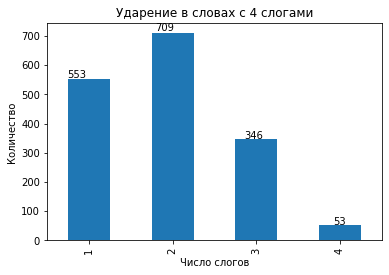

In [73]:
ax = df_strong[
    (df_strong['syl_num'] == 4) & (df_strong['stress_slot'] != 'no stress')
]['stress_slot'].value_counts(sort=False).plot.bar()
plt.title('Ударение в словах с 4 слогами')
plt.xlabel('Число слогов')
plt.ylabel('Количество')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.06,p.get_height() * 1.01))

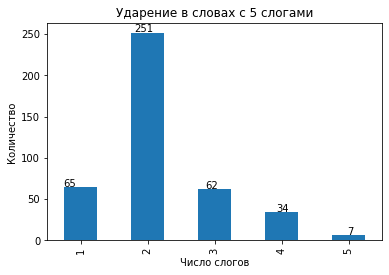

In [74]:
ax = df_strong[
    (df_strong['syl_num'] == 5) & (df_strong['stress_slot'] != 'no stress')
]['stress_slot'].value_counts(sort=False).plot.bar()
plt.title('Ударение в словах с 5 слогами')
plt.xlabel('Число слогов')
plt.ylabel('Количество')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.06,p.get_height() * 1.007))

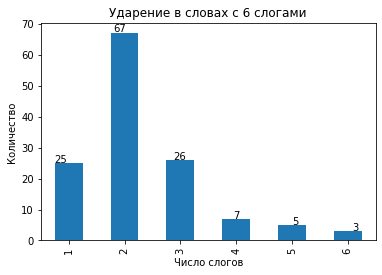

In [75]:
ax = df_strong[
    (df_strong['syl_num'] == 6) & (df_strong['stress_slot'] != 'no stress')
]['stress_slot'].value_counts(sort=False).plot.bar()
plt.title('Ударение в словах с 6 слогами')
plt.xlabel('Число слогов')
plt.ylabel('Количество')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.07,p.get_height() * 1.007))

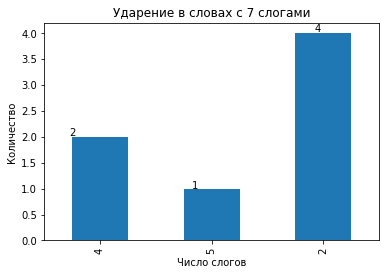

In [76]:
ax = df_strong[
    (df_strong['syl_num'] == 7) & (df_strong['stress_slot'] != 'no stress')
]['stress_slot'].value_counts(sort=False).plot.bar()
plt.title('Ударение в словах с 7 слогами')
plt.xlabel('Число слогов')
plt.ylabel('Количество')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.1,p.get_height() * 1.007))

### А теперь про слабые ударения

In [77]:
syl_num2 = []
stress_slot2 = []
weak = {}

for var in var_itog:
    var = var.split('-')
    word2 = []
    for v in var:
        if v in vowels:
            word2.append(v)
    syl_num2.append(len(word2))
 
    c = 0
    for w in word2:
        if w in weak_stress:
            stress_slot2.append(c+1)
            break
        c+=1
    if c == len(word2):
        stress_slot2.append('no stress')
        
weak['syl_num'] = syl_num2
weak['stress_slot'] = stress_slot2

In [78]:
df_weak = pd.DataFrame(data=weak)

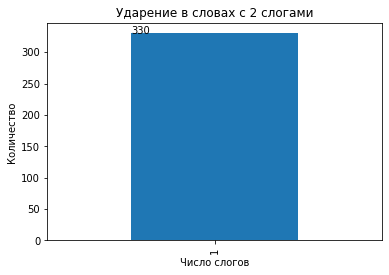

In [79]:
ax = df_weak[
    (df_weak['syl_num'] == 2) & (df_weak['stress_slot'] != 'no stress')
]['stress_slot'].value_counts().plot.bar()
plt.title('Ударение в словах с 2 слогами')
plt.xlabel('Число слогов')
plt.ylabel('Количество')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(),p.get_height()))

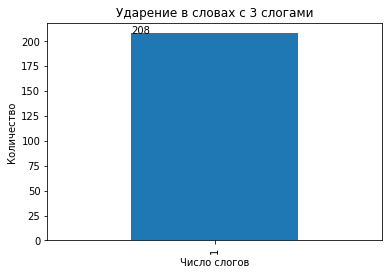

In [80]:
ax = df_weak[
    (df_weak['syl_num'] == 3) & (df_weak['stress_slot'] != 'no stress')
]['stress_slot'].value_counts().plot.bar()
plt.title('Ударение в словах с 3 слогами')
plt.xlabel('Число слогов')
plt.ylabel('Количество')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(),p.get_height()))

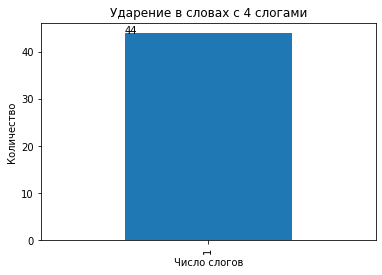

In [81]:
ax = df_weak[
    (df_weak['syl_num'] == 4) & (df_weak['stress_slot'] != 'no stress')
]['stress_slot'].value_counts().plot.bar()
plt.title('Ударение в словах с 4 слогами')
plt.xlabel('Число слогов')
plt.ylabel('Количество')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(),p.get_height()))

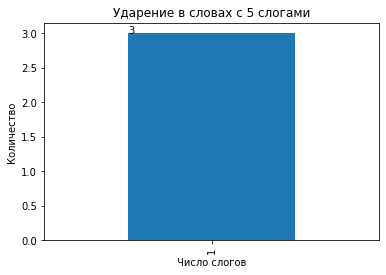

In [82]:
ax = df_weak[
    (df_weak['syl_num'] == 5) & (df_weak['stress_slot'] != 'no stress')
]['stress_slot'].value_counts().plot.bar()
plt.title('Ударение в словах с 5 слогами')
plt.xlabel('Число слогов')
plt.ylabel('Количество')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(),p.get_height()))